Conv2DTranspose 이용한 WGAN-GP는 잘 작동, Checkerboard Artifacts 발생
// Upsampling + Conv2D 는 일정 정도 이상 학습 진행 불가
// Upsampling + Conv2D + Conv2D 구조로 변경후 학습은 되나 Mode Collapse 발생
// Reshape + Conv2D 구조는 일정 정도 이상 학습 진행 불가 + Checkerboard Artifacts , batch size = 32로 감소 후 학습 개선

In [4]:
%matplotlib inline

import numpy as np
import os
import matplotlib.pyplot as plt

print(os.getcwd())
os.chdir('/home/hongbeom/Workspace/JKP/Generative_Model_Drill')
from models.WGANGP3 import WGANGP
from utils.loaders import load_celeb

import pickle

/home/hongbeom/Workspace/JKP/Generative_Model_Drill


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0009'
DATA_NAME = 'celeb'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 64

In [4]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 202599 images belonging to 1 classes.


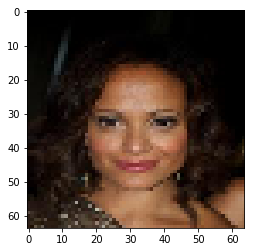

In [5]:
plt.imshow((x_train[0][0][0]+1)/2)

In [6]:
gan = WGANGP(input_dim = (IMAGE_SIZE, IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [4,4,4,4]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_reshape_kernel_size = [128,64,32,16]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [3,3,3,3]
        , generator_conv_strides = [1,1,1,1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
gan.critic.summary()
gan.generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  3136      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  131200    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
critic_conv_2 (Conv2D)       multiple                  524544    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    multiple                  0     

In [8]:
EPOCHS = 10000
PRINT_EVERY_N_BATCHES = 50
N_CRITIC = 5
BATCH_SIZE = 32

In [9]:
%%time
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)


0 (5, 1) [D loss: (7.0412)(R -1.5191, F 0.0006, G 0.8560)] [G loss: -0.5707]
1 (5, 1) [D loss: (-35.5000)(R -35.8894, F 0.2084, G 0.0181)] [G loss: -12.6970]
2 (5, 1) [D loss: (-118.5803)(R -197.3428, F -0.0393, G 7.8802)] [G loss: -32.5575]
3 (5, 1) [D loss: (-158.4883)(R -258.1798, F 0.8796, G 9.8812)] [G loss: -40.1668]
4 (5, 1) [D loss: (-150.5934)(R -256.2112, F 1.0639, G 10.4554)] [G loss: -46.0817]
5 (5, 1) [D loss: (-153.0923)(R -249.3752, F 1.7515, G 9.4531)] [G loss: -49.4614]
6 (5, 1) [D loss: (-146.7264)(R -233.9854, F 2.5735, G 8.4685)] [G loss: -51.7775]
7 (5, 1) [D loss: (-163.7178)(R -252.5259, F 3.3669, G 8.5441)] [G loss: -60.7185]
8 (5, 1) [D loss: (-149.4150)(R -261.2122, F 4.8670, G 10.6930)] [G loss: -54.1581]
9 (5, 1) [D loss: (-152.4059)(R -235.2832, F 4.9123, G 7.7965)] [G loss: -61.6112]
10 (5, 1) [D loss: (-133.1564)(R -220.4781, F 5.3962, G 8.1925)] [G loss: -56.6073]
11 (5, 1) [D loss: (-143.0677)(R -267.3380, F 6.9353, G 11.7335)] [G loss: -58.6081]
12 (5,

93 (5, 1) [D loss: (-104.8961)(R -203.9911, F 50.0698, G 4.9025)] [G loss: -66.6345]
94 (5, 1) [D loss: (-98.5328)(R -208.7139, F 55.5004, G 5.4681)] [G loss: -87.4906]
95 (5, 1) [D loss: (-104.5822)(R -236.8242, F 64.4536, G 6.7788)] [G loss: -74.2140]
96 (5, 1) [D loss: (-115.3436)(R -240.7043, F 52.3079, G 7.3053)] [G loss: -77.4769]
97 (5, 1) [D loss: (-103.3249)(R -255.7108, F 89.9856, G 6.2400)] [G loss: -92.8395]
98 (5, 1) [D loss: (-97.0343)(R -294.7653, F 124.4320, G 7.3299)] [G loss: -52.7446]
99 (5, 1) [D loss: (-120.1089)(R -243.4830, F 64.5914, G 5.8783)] [G loss: -70.9909]
100 (5, 1) [D loss: (-107.9256)(R -274.5000, F 107.3756, G 5.9199)] [G loss: -106.3177]
101 (5, 1) [D loss: (-114.9724)(R -294.3231, F 117.4803, G 6.1870)] [G loss: -135.3623]
102 (5, 1) [D loss: (-97.2919)(R -213.0316, F 76.6484, G 3.9091)] [G loss: -82.4362]
103 (5, 1) [D loss: (-107.5275)(R -248.0516, F 94.8275, G 4.5696)] [G loss: -126.9935]
104 (5, 1) [D loss: (-88.9115)(R -282.1475, F 133.8011, G 

188 (5, 1) [D loss: (-90.6316)(R -244.5582, F 120.2783, G 3.3648)] [G loss: -126.2670]
189 (5, 1) [D loss: (-89.4701)(R -201.9365, F 83.3092, G 2.9157)] [G loss: -119.3559]
190 (5, 1) [D loss: (-90.5219)(R -220.3910, F 94.1572, G 3.5712)] [G loss: -85.9965]
191 (5, 1) [D loss: (-64.6079)(R -173.3309, F 53.4060, G 5.5317)] [G loss: -92.5297]
192 (5, 1) [D loss: (-111.9852)(R -192.0799, F 38.8494, G 4.1245)] [G loss: -111.0979]
193 (5, 1) [D loss: (-84.5336)(R -209.7422, F 82.3311, G 4.2878)] [G loss: -82.6216]
194 (5, 1) [D loss: (-66.8915)(R -224.5446, F 120.4772, G 3.7176)] [G loss: -84.4376]
195 (5, 1) [D loss: (-79.8207)(R -203.9961, F 86.7179, G 3.7457)] [G loss: -95.2360]
196 (5, 1) [D loss: (-98.1972)(R -229.1151, F 88.4031, G 4.2515)] [G loss: -168.0086]
197 (5, 1) [D loss: (-95.2889)(R -243.3340, F 97.4244, G 5.0621)] [G loss: -104.1243]
198 (5, 1) [D loss: (-83.1291)(R -181.9425, F 55.1815, G 4.3632)] [G loss: -54.9573]
199 (5, 1) [D loss: (-61.2307)(R -238.2742, F 144.8494, G

284 (5, 1) [D loss: (-56.0134)(R -163.2689, F 68.9805, G 3.8275)] [G loss: -35.3630]
285 (5, 1) [D loss: (-55.1702)(R -151.7257, F 63.4621, G 3.3093)] [G loss: -61.5708]
286 (5, 1) [D loss: (-95.8908)(R -182.8381, F 48.8254, G 3.8122)] [G loss: -52.1493]
287 (5, 1) [D loss: (-80.6900)(R -123.6327, F 22.1231, G 2.0820)] [G loss: -34.6324]
288 (5, 1) [D loss: (-39.8606)(R -138.8902, F 65.3624, G 3.3667)] [G loss: -43.0912]
289 (5, 1) [D loss: (-85.8020)(R -135.7917, F 22.1217, G 2.7868)] [G loss: -50.6034]
290 (5, 1) [D loss: (-49.5559)(R -104.5881, F 31.8903, G 2.3142)] [G loss: -40.6281]
291 (5, 1) [D loss: (-74.0843)(R -135.9288, F 39.8035, G 2.2041)] [G loss: -52.8642]
292 (5, 1) [D loss: (-59.3968)(R -136.7693, F 41.1573, G 3.6215)] [G loss: -36.3824]
293 (5, 1) [D loss: (-59.0561)(R -121.0807, F 27.2542, G 3.4770)] [G loss: -40.9842]
294 (5, 1) [D loss: (-64.9988)(R -106.9500, F 9.2201, G 3.2731)] [G loss: -37.9204]
295 (5, 1) [D loss: (-70.2220)(R -125.5879, F 27.5711, G 2.7795)] 

380 (5, 1) [D loss: (-67.2667)(R -150.9545, F 57.1507, G 2.6537)] [G loss: -37.6815]
381 (5, 1) [D loss: (-66.5191)(R -163.9131, F 65.8786, G 3.1515)] [G loss: -67.8783]
382 (5, 1) [D loss: (-48.2394)(R -199.9288, F 108.8113, G 4.2878)] [G loss: -79.5723]
383 (5, 1) [D loss: (-66.0159)(R -157.7342, F 65.1225, G 2.6596)] [G loss: -58.9110]
384 (5, 1) [D loss: (-80.2041)(R -166.9093, F 35.1404, G 5.1565)] [G loss: -8.2116]
385 (5, 1) [D loss: (-68.8268)(R -212.2695, F 106.3165, G 3.7126)] [G loss: -153.2499]
386 (5, 1) [D loss: (-47.3106)(R -155.4752, F 81.3278, G 2.6837)] [G loss: -67.5721]
387 (5, 1) [D loss: (-59.2970)(R -157.1229, F 73.8040, G 2.4022)] [G loss: -83.9731]
388 (5, 1) [D loss: (-57.5440)(R -166.4632, F 82.9389, G 2.5980)] [G loss: -80.2478]
389 (5, 1) [D loss: (-56.6433)(R -168.9909, F 93.2094, G 1.9138)] [G loss: -123.4599]
390 (5, 1) [D loss: (-55.7526)(R -176.9016, F 95.2148, G 2.5934)] [G loss: -86.0391]
391 (5, 1) [D loss: (-60.5501)(R -148.9213, F 69.0798, G 1.929

477 (5, 1) [D loss: (-104.2133)(R -182.2688, F 41.0424, G 3.7013)] [G loss: -77.0693]
478 (5, 1) [D loss: (-83.1547)(R -187.6234, F 64.5988, G 3.9870)] [G loss: -85.9822]
479 (5, 1) [D loss: (-82.4584)(R -168.4214, F 50.8267, G 3.5136)] [G loss: -86.8920]
480 (5, 1) [D loss: (-77.6245)(R -151.7837, F 44.6432, G 2.9516)] [G loss: -84.7851]
481 (5, 1) [D loss: (-84.1276)(R -133.0207, F 16.0382, G 3.2855)] [G loss: -49.1323]
482 (5, 1) [D loss: (-73.7682)(R -147.9536, F 49.3943, G 2.4791)] [G loss: -61.3292]
483 (5, 1) [D loss: (-86.4998)(R -155.0126, F 45.6529, G 2.2860)] [G loss: -60.9619]
484 (5, 1) [D loss: (-87.5596)(R -137.9904, F 14.9851, G 3.5446)] [G loss: -73.1615]
485 (5, 1) [D loss: (-73.2948)(R -155.8124, F 54.0793, G 2.8438)] [G loss: -104.6738]
486 (5, 1) [D loss: (-97.3402)(R -168.3241, F 32.9464, G 3.8037)] [G loss: -74.2630]
487 (5, 1) [D loss: (-88.3067)(R -147.7923, F 26.7779, G 3.2708)] [G loss: -82.7636]
488 (5, 1) [D loss: (-87.8896)(R -178.2536, F 58.1734, G 3.2191

574 (5, 1) [D loss: (-65.7061)(R -147.2809, F 53.5274, G 2.8047)] [G loss: -65.5458]
575 (5, 1) [D loss: (-59.2610)(R -167.0616, F 85.7859, G 2.2015)] [G loss: -82.6494]
576 (5, 1) [D loss: (-52.5187)(R -149.6821, F 73.3336, G 2.3830)] [G loss: -85.4624]
577 (5, 1) [D loss: (-59.2070)(R -151.9835, F 68.2715, G 2.4505)] [G loss: -79.0693]
578 (5, 1) [D loss: (-57.4198)(R -160.5503, F 78.0586, G 2.5072)] [G loss: -88.0075]
579 (5, 1) [D loss: (-63.9256)(R -140.0604, F 49.1035, G 2.7031)] [G loss: -54.2232]
580 (5, 1) [D loss: (-52.5791)(R -166.7219, F 90.5440, G 2.3599)] [G loss: -87.9370]
581 (5, 1) [D loss: (-53.0500)(R -155.3408, F 77.4605, G 2.4830)] [G loss: -75.4629]
582 (5, 1) [D loss: (-58.8501)(R -161.7872, F 73.3635, G 2.9574)] [G loss: -63.6642]
583 (5, 1) [D loss: (-49.3103)(R -130.8930, F 48.3166, G 3.3266)] [G loss: -43.7283]
584 (5, 1) [D loss: (-64.2447)(R -154.2823, F 66.8578, G 2.3180)] [G loss: -74.9518]
585 (5, 1) [D loss: (-52.5350)(R -133.3831, F 62.5151, G 1.8333)]

670 (5, 1) [D loss: (-42.5875)(R -115.7072, F 47.2721, G 2.5848)] [G loss: -43.7644]
671 (5, 1) [D loss: (-102.3004)(R -149.1520, F 18.2363, G 2.8615)] [G loss: -60.9384]
672 (5, 1) [D loss: (-65.6743)(R -140.2972, F 59.3146, G 1.5308)] [G loss: -78.3996]
673 (5, 1) [D loss: (-74.0477)(R -159.6118, F 59.6744, G 2.5890)] [G loss: -83.3537]
674 (5, 1) [D loss: (-50.0793)(R -146.0945, F 78.8107, G 1.7204)] [G loss: -101.5792]
675 (5, 1) [D loss: (-58.5324)(R -198.5134, F 113.5402, G 2.6441)] [G loss: -118.2321]
676 (5, 1) [D loss: (-97.3928)(R -163.5188, F 37.8853, G 2.8241)] [G loss: -101.4950]
677 (5, 1) [D loss: (-100.3388)(R -193.1705, F 68.6212, G 2.4211)] [G loss: -131.6822]
678 (5, 1) [D loss: (-102.0594)(R -188.1891, F 47.5995, G 3.8530)] [G loss: -115.6240]
679 (5, 1) [D loss: (-72.5867)(R -164.4088, F 60.8369, G 3.0985)] [G loss: -139.5900]
680 (5, 1) [D loss: (-70.9211)(R -197.1503, F 81.1615, G 4.5068)] [G loss: -132.1628]
681 (5, 1) [D loss: (-74.5244)(R -200.8123, F 97.2262,

766 (5, 1) [D loss: (-46.9364)(R -134.8947, F 72.9868, G 1.4971)] [G loss: -72.6137]
767 (5, 1) [D loss: (-49.2648)(R -154.6882, F 81.1748, G 2.4249)] [G loss: -101.9589]
768 (5, 1) [D loss: (-42.8450)(R -156.7895, F 89.8390, G 2.4105)] [G loss: -94.8496]
769 (5, 1) [D loss: (-63.4675)(R -140.4622, F 56.0439, G 2.0951)] [G loss: -88.0350]
770 (5, 1) [D loss: (-70.7425)(R -135.7298, F 36.7942, G 2.8193)] [G loss: -105.9907]
771 (5, 1) [D loss: (-70.7541)(R -137.9467, F 36.6450, G 3.0548)] [G loss: -103.0432]
772 (5, 1) [D loss: (-69.7951)(R -135.2935, F 38.8887, G 2.6610)] [G loss: -94.5508]
773 (5, 1) [D loss: (-54.1887)(R -124.7975, F 53.6393, G 1.6969)] [G loss: -125.0818]
774 (5, 1) [D loss: (-67.1497)(R -123.8902, F 27.2537, G 2.9487)] [G loss: -145.3673]
775 (5, 1) [D loss: (-61.6065)(R -146.2889, F 58.3924, G 2.6290)] [G loss: -136.7640]
776 (5, 1) [D loss: (-60.0553)(R -135.5611, F 56.3164, G 1.9189)] [G loss: -137.9416]
777 (5, 1) [D loss: (-62.3516)(R -164.7070, F 79.3880, G 2

862 (5, 1) [D loss: (-14.0232)(R -209.0672, F 159.3421, G 3.5702)] [G loss: -239.9247]
863 (5, 1) [D loss: (-64.0484)(R -240.1876, F 134.3245, G 4.1815)] [G loss: -222.9163]
864 (5, 1) [D loss: (-89.3355)(R -266.5103, F 145.3470, G 3.1828)] [G loss: -235.4659]
865 (5, 1) [D loss: (-95.2740)(R -266.4001, F 139.9257, G 3.1200)] [G loss: -224.5857]
866 (5, 1) [D loss: (-55.7865)(R -221.2409, F 149.3975, G 1.6057)] [G loss: -151.6663]
867 (5, 1) [D loss: (-46.1677)(R -259.5255, F 181.1641, G 3.2194)] [G loss: -152.4084]
868 (5, 1) [D loss: (-52.9233)(R -228.4193, F 151.9743, G 2.3522)] [G loss: -165.2737]
869 (5, 1) [D loss: (-40.0973)(R -193.9806, F 138.0341, G 1.5849)] [G loss: -113.6334]
870 (5, 1) [D loss: (-42.4148)(R -178.2549, F 114.8949, G 2.0945)] [G loss: -133.5887]
871 (5, 1) [D loss: (-59.1251)(R -197.2536, F 117.1012, G 2.1027)] [G loss: -129.9809]
872 (5, 1) [D loss: (-52.2683)(R -177.9715, F 107.8148, G 1.7888)] [G loss: -131.6614]
873 (5, 1) [D loss: (-42.0542)(R -205.6943,

958 (5, 1) [D loss: (-51.7311)(R -104.9527, F 34.3364, G 1.8885)] [G loss: -16.9654]
959 (5, 1) [D loss: (-56.3431)(R -113.0584, F 32.7270, G 2.3988)] [G loss: -29.6806]
960 (5, 1) [D loss: (-30.2694)(R -131.2094, F 73.6027, G 2.7337)] [G loss: -54.0990]
961 (5, 1) [D loss: (-68.1231)(R -132.9470, F 28.4435, G 3.6380)] [G loss: -57.7068]
962 (5, 1) [D loss: (-79.6555)(R -176.3253, F 70.1141, G 2.6556)] [G loss: -105.5138]
963 (5, 1) [D loss: (-69.8678)(R -152.0559, F 41.7146, G 4.0473)] [G loss: -123.5250]
964 (5, 1) [D loss: (-42.5989)(R -162.2395, F 76.1772, G 4.3463)] [G loss: -161.7100]
965 (5, 1) [D loss: (-112.2207)(R -174.8380, F 25.0903, G 3.7527)] [G loss: -134.4569]
966 (5, 1) [D loss: (-53.6522)(R -142.7799, F 31.5336, G 5.7594)] [G loss: -177.5357]
967 (5, 1) [D loss: (-61.0764)(R -178.6973, F 72.6274, G 4.4993)] [G loss: -167.4473]
968 (5, 1) [D loss: (-58.5416)(R -140.9486, F 21.3331, G 6.1074)] [G loss: -156.7087]
969 (5, 1) [D loss: (-46.3534)(R -162.0680, F 73.5198, G 

1053 (5, 1) [D loss: (-85.9840)(R -222.7170, F 102.0013, G 3.4732)] [G loss: -247.8908]
1054 (5, 1) [D loss: (-81.8108)(R -186.5828, F 74.5388, G 3.0233)] [G loss: -229.2703]
1055 (5, 1) [D loss: (-53.6159)(R -155.2720, F 76.3475, G 2.5309)] [G loss: -185.8227]
1056 (5, 1) [D loss: (-108.4609)(R -204.7901, F 58.3408, G 3.7988)] [G loss: -303.8580]
1057 (5, 1) [D loss: (-64.2074)(R -159.0494, F 57.7699, G 3.7072)] [G loss: -214.6481]
1058 (5, 1) [D loss: (-80.5662)(R -175.0695, F 70.1398, G 2.4364)] [G loss: -286.7219]
1059 (5, 1) [D loss: (-61.0984)(R -90.6895, F 5.6443, G 2.3947)] [G loss: -64.2890]
1060 (5, 1) [D loss: (-68.6571)(R -115.2827, F 17.3863, G 2.9239)] [G loss: -30.6315]
1061 (5, 1) [D loss: (-59.7656)(R -102.3037, F 21.9660, G 2.0572)] [G loss: -114.5510]
1062 (5, 1) [D loss: (-54.6920)(R -107.0406, F 22.3051, G 3.0043)] [G loss: -58.3276]
1063 (5, 1) [D loss: (-74.7753)(R -119.9780, F 8.4304, G 3.6772)] [G loss: -51.4703]
1064 (5, 1) [D loss: (-80.6272)(R -141.9858, F 2

1148 (5, 1) [D loss: (-53.1580)(R -204.9721, F 132.5533, G 1.9261)] [G loss: -163.7667]
1149 (5, 1) [D loss: (-54.2049)(R -268.8857, F 193.4738, G 2.1207)] [G loss: -268.0974]
1150 (5, 1) [D loss: (-56.2797)(R -237.5675, F 162.3924, G 1.8895)] [G loss: -179.9828]
1151 (5, 1) [D loss: (-64.6006)(R -322.6318, F 223.4765, G 3.4555)] [G loss: -291.2385]
1152 (5, 1) [D loss: (-55.5257)(R -235.4421, F 154.9570, G 2.4959)] [G loss: -157.1233]
1153 (5, 1) [D loss: (-87.5386)(R -277.1252, F 162.7743, G 2.6812)] [G loss: -129.7833]
1154 (5, 1) [D loss: (-54.9882)(R -347.7172, F 271.3121, G 2.1417)] [G loss: -252.1201]
1155 (5, 1) [D loss: (-55.7721)(R -310.5135, F 228.4055, G 2.6336)] [G loss: -224.1445]
1156 (5, 1) [D loss: (-50.1363)(R -329.4273, F 258.9436, G 2.0347)] [G loss: -260.4948]
1157 (5, 1) [D loss: (-62.7028)(R -307.7722, F 214.3709, G 3.0699)] [G loss: -179.7219]
1158 (5, 1) [D loss: (-63.5820)(R -330.6735, F 243.3625, G 2.3729)] [G loss: -209.6066]
1159 (5, 1) [D loss: (-50.8921)(

1242 (5, 1) [D loss: (-58.0605)(R -169.4918, F 94.3382, G 1.7093)] [G loss: -120.5457]
1243 (5, 1) [D loss: (-51.1119)(R -160.1807, F 80.8452, G 2.8224)] [G loss: -136.8217]
1244 (5, 1) [D loss: (-36.5968)(R -188.6387, F 132.9056, G 1.9136)] [G loss: -143.0294]
1245 (5, 1) [D loss: (-29.1416)(R -123.3033, F 67.7976, G 2.6364)] [G loss: -102.9554]
1246 (5, 1) [D loss: (-37.5888)(R -152.0108, F 93.5297, G 2.0892)] [G loss: -109.5223]
1247 (5, 1) [D loss: (-50.5006)(R -160.8383, F 95.0596, G 1.5278)] [G loss: -120.1627]
1248 (5, 1) [D loss: (-33.6183)(R -147.9486, F 93.7097, G 2.0621)] [G loss: -93.0731]
1249 (5, 1) [D loss: (-64.3957)(R -157.8620, F 78.1908, G 1.5275)] [G loss: -98.8060]
1250 (5, 1) [D loss: (-50.9901)(R -170.4048, F 101.1758, G 1.8239)] [G loss: -89.2455]
1251 (5, 1) [D loss: (-41.3925)(R -154.3317, F 93.1376, G 1.9802)] [G loss: -87.3785]
1252 (5, 1) [D loss: (-48.3417)(R -152.5583, F 83.6401, G 2.0577)] [G loss: -72.6334]
1253 (5, 1) [D loss: (-50.0154)(R -132.1000, F

1337 (5, 1) [D loss: (-34.5053)(R -92.7744, F 41.9333, G 1.6336)] [G loss: -47.4956]
1338 (5, 1) [D loss: (-49.7186)(R -111.5827, F 46.4795, G 1.5385)] [G loss: -68.9462]
1339 (5, 1) [D loss: (-40.6620)(R -86.9035, F 33.1424, G 1.3099)] [G loss: -23.2833]
1340 (5, 1) [D loss: (-31.8234)(R -81.3482, F 36.4439, G 1.3081)] [G loss: -23.1585]
1341 (5, 1) [D loss: (-44.3072)(R -73.7164, F 14.5288, G 1.4880)] [G loss: -6.4818]
1342 (5, 1) [D loss: (-35.0660)(R -80.2924, F 32.3913, G 1.2835)] [G loss: -13.0740]
1343 (5, 1) [D loss: (-39.8885)(R -72.7715, F 20.1480, G 1.2735)] [G loss: -11.5982]
1344 (5, 1) [D loss: (-48.4337)(R -70.8572, F 8.0365, G 1.4387)] [G loss: -8.1064]
1345 (5, 1) [D loss: (-59.2704)(R -78.9488, F 3.8100, G 1.5868)] [G loss: -25.2499]
1346 (5, 1) [D loss: (-54.7750)(R -54.5729, F -15.0290, G 1.4827)] [G loss: 0.6987]
1347 (5, 1) [D loss: (-42.9632)(R -79.7102, F 20.2153, G 1.6532)] [G loss: -46.2332]
1348 (5, 1) [D loss: (-18.7386)(R -48.0700, F 12.8172, G 1.6514)] [G 

1434 (5, 1) [D loss: (-33.0134)(R -102.5757, F 49.8539, G 1.9708)] [G loss: -68.1996]
1435 (5, 1) [D loss: (-38.8779)(R -110.9830, F 57.8082, G 1.4297)] [G loss: -42.0886]
1436 (5, 1) [D loss: (-36.4743)(R -115.9290, F 62.5753, G 1.6879)] [G loss: -57.2395]
1437 (5, 1) [D loss: (-50.0717)(R -119.8086, F 52.0058, G 1.7731)] [G loss: -28.3520]
1438 (5, 1) [D loss: (-49.6433)(R -101.8135, F 35.1262, G 1.7044)] [G loss: -39.5801]
1439 (5, 1) [D loss: (-40.5946)(R -106.3794, F 51.1045, G 1.4680)] [G loss: -34.6478]
1440 (5, 1) [D loss: (-44.1842)(R -100.5938, F 40.1460, G 1.6264)] [G loss: -32.3157]
1441 (5, 1) [D loss: (-46.5028)(R -105.3574, F 43.1455, G 1.5709)] [G loss: -30.8313]
1442 (5, 1) [D loss: (-38.1200)(R -88.5041, F 35.2274, G 1.5157)] [G loss: -39.0522]
1443 (5, 1) [D loss: (-41.4450)(R -99.8320, F 44.5266, G 1.3860)] [G loss: -36.8882]
1444 (5, 1) [D loss: (-17.1255)(R -81.0713, F 47.6470, G 1.6299)] [G loss: -32.4959]
1445 (5, 1) [D loss: (-37.8314)(R -86.4850, F 36.5460, G 

1530 (5, 1) [D loss: (-31.4315)(R -119.9138, F 66.6298, G 2.1853)] [G loss: -112.7219]
1531 (5, 1) [D loss: (-47.8167)(R -128.1138, F 66.5771, G 1.3720)] [G loss: -117.2744]
1532 (5, 1) [D loss: (-43.8767)(R -138.4250, F 80.3055, G 1.4243)] [G loss: -106.0290]
1533 (5, 1) [D loss: (-32.4933)(R -96.9232, F 39.8785, G 2.4551)] [G loss: -113.9546]
1534 (5, 1) [D loss: (-54.2482)(R -113.7076, F 38.2368, G 2.1223)] [G loss: -108.6213]
1535 (5, 1) [D loss: (-48.6506)(R -91.1025, F 21.3036, G 2.1148)] [G loss: -86.7085]
1536 (5, 1) [D loss: (-24.4645)(R -100.6820, F 62.4572, G 1.3760)] [G loss: -57.2984]
1537 (5, 1) [D loss: (-52.2261)(R -108.1782, F 41.3835, G 1.4569)] [G loss: -76.2423]
1538 (5, 1) [D loss: (-43.9105)(R -103.2125, F 42.3122, G 1.6990)] [G loss: -59.5144]
1539 (5, 1) [D loss: (-33.5271)(R -91.9128, F 40.8897, G 1.7496)] [G loss: -37.4328]
1540 (5, 1) [D loss: (-50.1299)(R -108.3308, F 40.5762, G 1.7625)] [G loss: -10.4798]
1541 (5, 1) [D loss: (-38.6262)(R -63.8155, F 10.571

1627 (5, 1) [D loss: (-38.5099)(R -159.2686, F 97.7812, G 2.2978)] [G loss: -115.8343]
1628 (5, 1) [D loss: (-45.8286)(R -173.9338, F 101.6622, G 2.6443)] [G loss: -86.0409]
1629 (5, 1) [D loss: (-78.0884)(R -178.6824, F 72.6182, G 2.7976)] [G loss: -80.8990]
1630 (5, 1) [D loss: (-53.1302)(R -150.7187, F 77.0356, G 2.0553)] [G loss: -47.4572]
1631 (5, 1) [D loss: (-55.0319)(R -149.7611, F 73.8380, G 2.0891)] [G loss: -81.0779]
1632 (5, 1) [D loss: (-56.8642)(R -149.4679, F 65.4674, G 2.7136)] [G loss: -41.7005]
1633 (5, 1) [D loss: (-38.4094)(R -138.9975, F 75.0244, G 2.5564)] [G loss: -64.5923]
1634 (5, 1) [D loss: (-61.0825)(R -170.6612, F 87.9794, G 2.1599)] [G loss: -64.6754]
1635 (5, 1) [D loss: (-47.9700)(R -130.4445, F 63.3860, G 1.9089)] [G loss: -35.6077]
1636 (5, 1) [D loss: (-42.7355)(R -106.4660, F 45.0119, G 1.8719)] [G loss: -48.1455]
1637 (5, 1) [D loss: (-56.6413)(R -134.5886, F 59.5623, G 1.8385)] [G loss: -37.0856]
1638 (5, 1) [D loss: (-41.1372)(R -107.2425, F 46.37

1723 (5, 1) [D loss: (-43.8412)(R -58.2110, F -1.0407, G 1.5410)] [G loss: -22.8102]
1724 (5, 1) [D loss: (-29.5405)(R -43.1341, F -1.5174, G 1.5111)] [G loss: -17.5983]
1725 (5, 1) [D loss: (-47.5861)(R -58.1075, F -6.2894, G 1.6811)] [G loss: -19.0034]
1726 (5, 1) [D loss: (-40.5849)(R -59.3246, F 0.7972, G 1.7943)] [G loss: -15.2150]
1727 (5, 1) [D loss: (-37.8250)(R -54.9792, F 0.4920, G 1.6662)] [G loss: -15.1203]
1728 (5, 1) [D loss: (-51.0130)(R -67.4398, F -0.7165, G 1.7143)] [G loss: -34.5988]
1729 (5, 1) [D loss: (-50.6203)(R -70.2276, F -4.9100, G 2.4517)] [G loss: 25.8109]
1730 (5, 1) [D loss: (-39.4296)(R -57.4514, F 6.8684, G 1.1153)] [G loss: -1.9440]
1731 (5, 1) [D loss: (-39.4306)(R -82.9731, F 28.2041, G 1.5338)] [G loss: -24.2697]
1732 (5, 1) [D loss: (-41.7050)(R -69.5911, F 12.3242, G 1.5562)] [G loss: -42.9470]
1733 (5, 1) [D loss: (-35.3799)(R -52.1189, F -6.2078, G 2.2947)] [G loss: 6.9731]
1734 (5, 1) [D loss: (-44.9544)(R -57.4785, F -0.6319, G 1.3156)] [G los

1820 (5, 1) [D loss: (-49.1521)(R 12.2886, F -92.6710, G 3.1230)] [G loss: 19.7012]
1821 (5, 1) [D loss: (-95.3809)(R -5.8826, F -121.0101, G 3.1512)] [G loss: 16.9691]
1822 (5, 1) [D loss: (-115.0114)(R -27.7209, F -147.9720, G 6.0682)] [G loss: -9.6221]
1823 (5, 1) [D loss: (-98.0485)(R -23.7725, F -118.9216, G 4.4646)] [G loss: -96.1109]
1824 (5, 1) [D loss: (-94.4484)(R 5.0478, F -131.2932, G 3.1797)] [G loss: -78.2203]
1825 (5, 1) [D loss: (-58.3534)(R 34.4112, F -121.9173, G 2.9153)] [G loss: -49.0445]
1826 (5, 1) [D loss: (-81.6447)(R -9.2879, F -95.5282, G 2.3171)] [G loss: -85.9979]
1827 (5, 1) [D loss: (-34.9839)(R 15.4637, F -63.8308, G 1.3383)] [G loss: -12.5292]
1828 (5, 1) [D loss: (-38.6206)(R 0.6775, F -52.2895, G 1.2991)] [G loss: -37.6144]
1829 (5, 1) [D loss: (-36.8080)(R 45.4059, F -96.7619, G 1.4548)] [G loss: 56.1780]
1830 (5, 1) [D loss: (-37.2159)(R 60.0469, F -113.4255, G 1.6163)] [G loss: 74.7148]
1831 (5, 1) [D loss: (-38.8037)(R 95.6398, F -155.1252, G 2.068

1916 (5, 1) [D loss: (-46.0930)(R -148.9225, F 81.5793, G 2.1250)] [G loss: -145.1222]
1917 (5, 1) [D loss: (-65.8859)(R -164.3629, F 76.2584, G 2.2219)] [G loss: -167.1230]
1918 (5, 1) [D loss: (-25.2316)(R -150.2034, F 108.7875, G 1.6184)] [G loss: -130.4476]
1919 (5, 1) [D loss: (-70.0863)(R -146.3886, F 53.7366, G 2.2566)] [G loss: -148.8073]
1920 (5, 1) [D loss: (-70.4807)(R -146.1533, F 52.9210, G 2.2752)] [G loss: -144.7698]
1921 (5, 1) [D loss: (-40.0183)(R -147.3243, F 90.0254, G 1.7281)] [G loss: -116.1208]
1922 (5, 1) [D loss: (-49.0712)(R -124.5932, F 57.9410, G 1.7581)] [G loss: -112.6974]
1923 (5, 1) [D loss: (-47.1781)(R -117.3712, F 52.7638, G 1.7429)] [G loss: -81.9361]
1924 (5, 1) [D loss: (-51.7700)(R -124.8117, F 52.9207, G 2.0121)] [G loss: -58.5788]
1925 (5, 1) [D loss: (-47.4483)(R -98.8432, F 35.0966, G 1.6298)] [G loss: -23.0578]
1926 (5, 1) [D loss: (-40.1254)(R -89.6281, F 33.7003, G 1.5802)] [G loss: -26.4602]
1927 (5, 1) [D loss: (-39.0582)(R -83.8498, F 28

2011 (5, 1) [D loss: (-52.9929)(R -191.9120, F 120.1141, G 1.8805)] [G loss: -124.4660]
2012 (5, 1) [D loss: (-57.0632)(R -195.6015, F 115.6318, G 2.2906)] [G loss: -175.0048]
2013 (5, 1) [D loss: (-67.3952)(R -202.7504, F 92.7043, G 4.2651)] [G loss: -236.1677]
2014 (5, 1) [D loss: (-51.3397)(R -200.9787, F 118.7380, G 3.0901)] [G loss: -94.5996]
2015 (5, 1) [D loss: (-67.6122)(R -236.8283, F 121.2060, G 4.8010)] [G loss: -72.3297]
2016 (5, 1) [D loss: (-74.0746)(R -216.3322, F 117.8124, G 2.4445)] [G loss: -91.6538]
2017 (5, 1) [D loss: (-59.4599)(R -171.1296, F 90.8289, G 2.0841)] [G loss: -96.9462]
2018 (5, 1) [D loss: (-68.8528)(R -225.4837, F 92.3483, G 6.4283)] [G loss: -66.4690]
2019 (5, 1) [D loss: (-71.1614)(R -215.7245, F 87.9404, G 5.6623)] [G loss: -52.9012]
2020 (5, 1) [D loss: (-118.4683)(R -303.0152, F 118.8908, G 6.5656)] [G loss: -63.7766]
2021 (5, 1) [D loss: (-58.2053)(R -160.1877, F 70.2677, G 3.1715)] [G loss: -37.6187]
2022 (5, 1) [D loss: (-59.0180)(R -151.5062,

2105 (5, 1) [D loss: (-37.3926)(R -86.2673, F 37.9182, G 1.0956)] [G loss: -40.4587]
2106 (5, 1) [D loss: (-33.4012)(R -78.6687, F 34.1637, G 1.1104)] [G loss: -27.4421]
2107 (5, 1) [D loss: (-38.6051)(R -68.6694, F 20.2983, G 0.9766)] [G loss: -22.4237]
2108 (5, 1) [D loss: (-39.1611)(R -65.0380, F 14.2298, G 1.1647)] [G loss: -23.5715]
2109 (5, 1) [D loss: (-40.1662)(R -65.6665, F 13.3170, G 1.2183)] [G loss: -21.9174]
2110 (5, 1) [D loss: (-32.8571)(R -57.7453, F 11.8118, G 1.3076)] [G loss: -26.0954]
2111 (5, 1) [D loss: (-37.0617)(R -46.7042, F -2.0003, G 1.1643)] [G loss: -27.4753]
2112 (5, 1) [D loss: (-44.2954)(R -49.4521, F -8.6914, G 1.3848)] [G loss: -22.2516]
2113 (5, 1) [D loss: (-37.4222)(R -49.7497, F 0.8946, G 1.1433)] [G loss: -5.0428]
2114 (5, 1) [D loss: (-35.8048)(R -55.9311, F 8.2375, G 1.1889)] [G loss: -9.1667]
2115 (5, 1) [D loss: (-33.3363)(R -52.7641, F 8.8219, G 1.0606)] [G loss: -8.3307]
2116 (5, 1) [D loss: (-20.8522)(R -49.6324, F 14.0575, G 1.4723)] [G lo

2202 (5, 1) [D loss: (-33.6447)(R -31.2156, F -11.8707, G 0.9442)] [G loss: -5.9358]
2203 (5, 1) [D loss: (-38.8340)(R -45.5179, F -2.7884, G 0.9472)] [G loss: -24.6934]
2204 (5, 1) [D loss: (-32.5639)(R -56.6019, F 13.4632, G 1.0575)] [G loss: -44.1857]
2205 (5, 1) [D loss: (-29.7537)(R -36.9632, F -0.8641, G 0.8073)] [G loss: -9.4066]
2206 (5, 1) [D loss: (-26.0292)(R -34.4067, F -1.3183, G 0.9696)] [G loss: -8.3215]
2207 (5, 1) [D loss: (-28.7914)(R -39.8338, F 0.8880, G 1.0154)] [G loss: -2.5924]
2208 (5, 1) [D loss: (-36.6189)(R -48.6526, F 1.7730, G 1.0261)] [G loss: -13.0989]
2209 (5, 1) [D loss: (-32.4207)(R -61.4214, F 18.9771, G 1.0024)] [G loss: -33.9855]
2210 (5, 1) [D loss: (-33.0915)(R -41.4367, F -3.1451, G 1.1490)] [G loss: -27.8688]
2211 (5, 1) [D loss: (-33.5747)(R -46.9912, F 4.3708, G 0.9046)] [G loss: -27.9026]
2212 (5, 1) [D loss: (-23.4815)(R -29.1380, F -4.2424, G 0.9899)] [G loss: -1.1232]
2213 (5, 1) [D loss: (-32.4902)(R -44.7279, F 5.2722, G 0.6966)] [G loss

2299 (5, 1) [D loss: (-91.1235)(R -49.2023, F -67.6830, G 2.5762)] [G loss: -73.1096]
2300 (5, 1) [D loss: (-75.6813)(R -46.1757, F -81.2419, G 5.1736)] [G loss: -105.0534]
2301 (5, 1) [D loss: (-79.0770)(R -32.5111, F -87.3928, G 4.0827)] [G loss: -66.8297]
2302 (5, 1) [D loss: (-48.7588)(R -71.3996, F 2.1616, G 2.0479)] [G loss: -55.0859]
2303 (5, 1) [D loss: (-45.3625)(R -101.4069, F 40.0977, G 1.5947)] [G loss: -79.8491]
2304 (5, 1) [D loss: (-48.9990)(R -102.0879, F 39.2867, G 1.3802)] [G loss: -78.8898]
2305 (5, 1) [D loss: (-37.7964)(R -138.4631, F 84.9072, G 1.5760)] [G loss: -76.7369]
2306 (5, 1) [D loss: (-38.0749)(R -128.7533, F 77.8306, G 1.2848)] [G loss: -63.8224]
2307 (5, 1) [D loss: (-50.5616)(R -119.9166, F 52.4901, G 1.6865)] [G loss: -28.4069]
2308 (5, 1) [D loss: (-39.2424)(R -76.3764, F 14.1160, G 2.3018)] [G loss: -23.0546]
2309 (5, 1) [D loss: (-49.4447)(R -92.8290, F 23.0178, G 2.0367)] [G loss: 11.1963]
2310 (5, 1) [D loss: (-72.9499)(R -92.0278, F -2.6798, G 2

2395 (5, 1) [D loss: (-28.8296)(R -80.3292, F 45.0902, G 0.6409)] [G loss: -44.8893]
2396 (5, 1) [D loss: (-29.3926)(R -60.9432, F 24.9506, G 0.6600)] [G loss: -21.6514]
2397 (5, 1) [D loss: (-21.4955)(R -42.6802, F 11.7671, G 0.9418)] [G loss: -16.7748]
2398 (5, 1) [D loss: (-26.5127)(R -54.7334, F 19.8042, G 0.8416)] [G loss: -23.1775]
2399 (5, 1) [D loss: (-31.5136)(R -58.3322, F 16.8296, G 0.9989)] [G loss: -16.2207]
2400 (5, 1) [D loss: (-21.1529)(R -70.4732, F 40.8718, G 0.8448)] [G loss: -32.7332]
2401 (5, 1) [D loss: (-31.0596)(R -55.3513, F 14.8981, G 0.9394)] [G loss: -18.7648]
2402 (5, 1) [D loss: (-28.2749)(R -42.3396, F 6.5275, G 0.7537)] [G loss: -8.0157]
2403 (5, 1) [D loss: (-23.5987)(R -59.5363, F 26.8017, G 0.9136)] [G loss: -15.8102]
2404 (5, 1) [D loss: (-29.8815)(R -43.0833, F 0.7802, G 1.2422)] [G loss: -12.9828]
2405 (5, 1) [D loss: (-23.7080)(R -56.3702, F 24.1343, G 0.8528)] [G loss: -24.3582]
2406 (5, 1) [D loss: (-22.9782)(R -52.2426, F 21.0153, G 0.8249)] [G

2493 (5, 1) [D loss: (-33.5816)(R 21.7598, F -69.0659, G 1.3725)] [G loss: 74.1697]
2494 (5, 1) [D loss: (-33.9587)(R 23.9731, F -76.1109, G 1.8179)] [G loss: 80.4319]
2495 (5, 1) [D loss: (-44.2373)(R 17.4995, F -77.5009, G 1.5764)] [G loss: 107.8327]
2496 (5, 1) [D loss: (-23.5834)(R 14.1474, F -50.3818, G 1.2651)] [G loss: 48.1787]
2497 (5, 1) [D loss: (-41.3463)(R 0.8452, F -54.6283, G 1.2437)] [G loss: 83.7841]
2498 (5, 1) [D loss: (-40.8080)(R 3.7674, F -56.6765, G 1.2101)] [G loss: 89.3957]
2499 (5, 1) [D loss: (-49.4134)(R 63.0819, F -138.9883, G 2.6493)] [G loss: 174.6902]
2500 (5, 1) [D loss: (-21.3211)(R 71.9415, F -113.9193, G 2.0657)] [G loss: 148.1119]
2501 (5, 1) [D loss: (-45.4296)(R 18.6548, F -80.9916, G 1.6907)] [G loss: 125.2523]
2502 (5, 1) [D loss: (-49.5998)(R 47.4796, F -119.0657, G 2.1986)] [G loss: 132.2340]
2503 (5, 1) [D loss: (-53.0659)(R 3.6584, F -74.3775, G 1.7653)] [G loss: 150.4373]
2504 (5, 1) [D loss: (-44.2584)(R 11.6993, F -68.4902, G 1.2533)] [G l

2588 (5, 1) [D loss: (-47.9382)(R -197.9149, F 137.7526, G 1.2224)] [G loss: -108.0160]
2589 (5, 1) [D loss: (-36.9936)(R -206.6609, F 154.4500, G 1.5217)] [G loss: -118.8450]
2590 (5, 1) [D loss: (-36.8424)(R -244.8398, F 161.1172, G 4.6880)] [G loss: -116.6741]
2591 (5, 1) [D loss: (-60.2696)(R -237.5959, F 142.9455, G 3.4381)] [G loss: -117.3231]
2592 (5, 1) [D loss: (-88.0230)(R -277.2868, F 150.5111, G 3.8753)] [G loss: -118.6439]
2593 (5, 1) [D loss: (-82.6002)(R -283.9849, F 151.0934, G 5.0291)] [G loss: -147.3540]
2594 (5, 1) [D loss: (-122.0201)(R -292.0965, F 112.5125, G 5.7564)] [G loss: -201.5651]
2595 (5, 1) [D loss: (-134.7001)(R -333.6232, F 128.0025, G 7.0921)] [G loss: -228.6883]
2596 (5, 1) [D loss: (-93.7431)(R -246.6046, F 96.4532, G 5.6408)] [G loss: -241.5803]
2597 (5, 1) [D loss: (-85.0437)(R -275.2038, F 93.5351, G 9.6625)] [G loss: -246.7290]
2598 (5, 1) [D loss: (-98.8863)(R -314.6349, F 153.1318, G 6.2617)] [G loss: -342.4725]
2599 (5, 1) [D loss: (-119.6112)

2682 (5, 1) [D loss: (-35.3762)(R -198.7981, F 155.8190, G 0.7603)] [G loss: -160.0084]
2683 (5, 1) [D loss: (-32.4288)(R -179.7720, F 139.5518, G 0.7791)] [G loss: -143.4648]
2684 (5, 1) [D loss: (-25.2764)(R -158.4497, F 125.2127, G 0.7961)] [G loss: -127.2316]
2685 (5, 1) [D loss: (-25.8664)(R -172.4614, F 138.7491, G 0.7846)] [G loss: -134.4659]
2686 (5, 1) [D loss: (-25.9437)(R -188.7404, F 154.9004, G 0.7896)] [G loss: -146.7448]
2687 (5, 1) [D loss: (-20.8426)(R -173.1461, F 143.9887, G 0.8315)] [G loss: -143.7037]
2688 (5, 1) [D loss: (-25.2419)(R -160.2683, F 125.2648, G 0.9762)] [G loss: -120.2790]
2689 (5, 1) [D loss: (-34.3718)(R -159.8861, F 119.4841, G 0.6030)] [G loss: -113.1701]
2690 (5, 1) [D loss: (-32.1160)(R -154.3650, F 114.7654, G 0.7484)] [G loss: -125.4447]
2691 (5, 1) [D loss: (-31.7285)(R -156.8933, F 117.1063, G 0.8059)] [G loss: -117.1052]
2692 (5, 1) [D loss: (-26.8127)(R -153.3108, F 115.7306, G 1.0767)] [G loss: -110.3992]
2693 (5, 1) [D loss: (-28.5201)(

2778 (5, 1) [D loss: (-16.4200)(R -92.9665, F 65.0677, G 1.1479)] [G loss: -77.4650]
2779 (5, 1) [D loss: (-32.8101)(R -92.0132, F 47.2126, G 1.1990)] [G loss: -64.8797]
2780 (5, 1) [D loss: (-22.1420)(R -108.3710, F 76.1585, G 1.0070)] [G loss: -85.6243]
2781 (5, 1) [D loss: (-20.3565)(R -93.0747, F 62.4149, G 1.0303)] [G loss: -86.2400]
2782 (5, 1) [D loss: (-27.9645)(R -100.9805, F 62.9110, G 1.0105)] [G loss: -83.6811]
2783 (5, 1) [D loss: (-23.6538)(R -98.8805, F 68.8374, G 0.6389)] [G loss: -72.8780]
2784 (5, 1) [D loss: (-30.1594)(R -96.4445, F 57.9664, G 0.8319)] [G loss: -69.3205]
2785 (5, 1) [D loss: (-16.4029)(R -92.4922, F 63.6210, G 1.2468)] [G loss: -74.3124]
2786 (5, 1) [D loss: (-21.5601)(R -86.9053, F 53.7745, G 1.1571)] [G loss: -67.4540]
2787 (5, 1) [D loss: (-32.0521)(R -103.7518, F 63.2453, G 0.8454)] [G loss: -59.9914]
2788 (5, 1) [D loss: (-34.7572)(R -81.6120, F 34.6672, G 1.2188)] [G loss: -21.7409]
2789 (5, 1) [D loss: (-33.9039)(R -73.2131, F 25.2755, G 1.403

2875 (5, 1) [D loss: (-20.0001)(R -75.3581, F 46.4442, G 0.8914)] [G loss: -72.5506]
2876 (5, 1) [D loss: (-23.8381)(R -72.1238, F 38.9772, G 0.9308)] [G loss: -66.5394]
2877 (5, 1) [D loss: (-38.8291)(R -79.5528, F 28.0108, G 1.2713)] [G loss: -76.1930]
2878 (5, 1) [D loss: (-46.7175)(R -97.4835, F 35.0120, G 1.5754)] [G loss: -99.4068]
2879 (5, 1) [D loss: (-28.7816)(R -91.6272, F 53.5499, G 0.9296)] [G loss: -76.3765]
2880 (5, 1) [D loss: (-36.1879)(R -100.8512, F 50.5855, G 1.4078)] [G loss: -89.9650]
2881 (5, 1) [D loss: (-37.8884)(R -104.4586, F 50.4806, G 1.6090)] [G loss: -82.1763]
2882 (5, 1) [D loss: (-42.5180)(R -105.8379, F 53.2317, G 1.0088)] [G loss: -77.6429]
2883 (5, 1) [D loss: (-33.9107)(R -99.2951, F 55.2101, G 1.0174)] [G loss: -62.4267]
2884 (5, 1) [D loss: (-27.3330)(R -83.1849, F 41.7694, G 1.4082)] [G loss: -66.2792]
2885 (5, 1) [D loss: (-36.1990)(R -101.9106, F 54.9674, G 1.0744)] [G loss: -35.0534]
2886 (5, 1) [D loss: (-46.7591)(R -85.1402, F 25.9854, G 1.23

2972 (5, 1) [D loss: (-43.9478)(R -33.9076, F -28.8511, G 1.8811)] [G loss: 4.6057]
2973 (5, 1) [D loss: (-40.1528)(R -22.5139, F -34.5799, G 1.6941)] [G loss: 26.8046]
2974 (5, 1) [D loss: (-35.4341)(R -37.6499, F -16.0205, G 1.8236)] [G loss: 10.2736]
2975 (5, 1) [D loss: (-15.8524)(R -21.1140, F -15.6358, G 2.0897)] [G loss: -16.2852]
2976 (5, 1) [D loss: (-31.0760)(R -39.4004, F -4.5193, G 1.2844)] [G loss: -7.8819]
2977 (5, 1) [D loss: (-28.6779)(R -39.3121, F 0.8374, G 0.9797)] [G loss: -10.3617]
2978 (5, 1) [D loss: (-24.9383)(R -45.4151, F 8.3057, G 1.2171)] [G loss: -17.0880]
2979 (5, 1) [D loss: (-45.4325)(R -53.5028, F -4.1348, G 1.2205)] [G loss: -39.3770]
2980 (5, 1) [D loss: (-42.1640)(R -56.0128, F 1.9741, G 1.1875)] [G loss: -1.4849]
2981 (5, 1) [D loss: (-27.5630)(R -37.1984, F 0.4623, G 0.9173)] [G loss: -12.3950]
2982 (5, 1) [D loss: (-32.3983)(R -40.4979, F -3.9250, G 1.2025)] [G loss: -24.0974]
2983 (5, 1) [D loss: (-24.3166)(R -58.5566, F 27.1131, G 0.7127)] [G lo

3069 (5, 1) [D loss: (-22.3675)(R -68.9636, F 40.6433, G 0.5953)] [G loss: -35.7081]
3070 (5, 1) [D loss: (-31.9305)(R -74.3316, F 33.4100, G 0.8991)] [G loss: -33.4810]
3071 (5, 1) [D loss: (-25.3795)(R -65.3466, F 34.7205, G 0.5247)] [G loss: -35.5259]
3072 (5, 1) [D loss: (-23.7195)(R -67.0542, F 36.4614, G 0.6873)] [G loss: -41.8332]
3073 (5, 1) [D loss: (-25.5443)(R -72.1057, F 39.2298, G 0.7332)] [G loss: -38.2177]
3074 (5, 1) [D loss: (-26.2840)(R -74.2442, F 41.4572, G 0.6503)] [G loss: -48.0857]
3075 (5, 1) [D loss: (-21.5753)(R -74.1499, F 45.7798, G 0.6795)] [G loss: -47.4616]
3076 (5, 1) [D loss: (-26.7499)(R -68.2843, F 34.2609, G 0.7274)] [G loss: -29.8793]
3077 (5, 1) [D loss: (-25.5427)(R -66.6110, F 29.2007, G 1.1868)] [G loss: -40.2636]
3078 (5, 1) [D loss: (-25.7487)(R -84.8190, F 50.3083, G 0.8762)] [G loss: -51.0612]
3079 (5, 1) [D loss: (-36.3842)(R -99.6626, F 53.7341, G 0.9544)] [G loss: -47.0939]
3080 (5, 1) [D loss: (-19.4677)(R -85.6114, F 59.8303, G 0.6313)]

3166 (5, 1) [D loss: (-51.4166)(R -27.3440, F -35.9035, G 1.1831)] [G loss: -49.6237]
3167 (5, 1) [D loss: (-29.1668)(R -29.8978, F -15.2149, G 1.5946)] [G loss: -42.9973]
3168 (5, 1) [D loss: (-27.9523)(R -20.6666, F -25.1504, G 1.7865)] [G loss: -40.1232]
3169 (5, 1) [D loss: (-30.7861)(R -46.3169, F 0.5669, G 1.4964)] [G loss: -57.7211]
3170 (5, 1) [D loss: (-25.8131)(R -44.2800, F 8.8678, G 0.9599)] [G loss: -55.6775]
3171 (5, 1) [D loss: (-25.3471)(R -39.6931, F 4.4812, G 0.9865)] [G loss: -44.7120]
3172 (5, 1) [D loss: (-26.6797)(R -46.7980, F 12.2692, G 0.7849)] [G loss: -24.9806]
3173 (5, 1) [D loss: (-35.9660)(R -48.9654, F 4.8096, G 0.8190)] [G loss: -40.0616]
3174 (5, 1) [D loss: (-11.6580)(R -36.3849, F 16.7890, G 0.7938)] [G loss: -26.6839]
3175 (5, 1) [D loss: (-31.8887)(R -56.5787, F 17.4356, G 0.7254)] [G loss: 2.5234]
3176 (5, 1) [D loss: (-28.9217)(R -62.7100, F 26.1534, G 0.7635)] [G loss: -12.3283]
3177 (5, 1) [D loss: (-33.9651)(R -86.7762, F 38.7240, G 1.4087)] [G

3262 (5, 1) [D loss: (-71.7510)(R -95.8234, F -9.9896, G 3.4062)] [G loss: -55.9192]
3263 (5, 1) [D loss: (-56.2489)(R -98.9635, F 32.0048, G 1.0710)] [G loss: -81.0101]
3264 (5, 1) [D loss: (-38.6379)(R -94.0092, F 30.4058, G 2.4965)] [G loss: -90.7058]
3265 (5, 1) [D loss: (-81.0939)(R -100.3434, F 1.9971, G 1.7252)] [G loss: -74.7848]
3266 (5, 1) [D loss: (-57.3567)(R -62.5313, F -16.1205, G 2.1295)] [G loss: -70.8996]
3267 (5, 1) [D loss: (-51.2814)(R -69.6051, F -8.0059, G 2.6330)] [G loss: -78.5302]
3268 (5, 1) [D loss: (-36.1084)(R -64.1887, F 7.3947, G 2.0686)] [G loss: -84.9992]
3269 (5, 1) [D loss: (-62.0631)(R -54.2020, F -37.0777, G 2.9217)] [G loss: -69.8562]
3270 (5, 1) [D loss: (-36.4799)(R -58.1964, F 8.3679, G 1.3349)] [G loss: -97.3991]
3271 (5, 1) [D loss: (-50.0590)(R -45.2307, F -43.6946, G 3.8866)] [G loss: -87.9168]
3272 (5, 1) [D loss: (-26.9043)(R -69.3423, F 19.4359, G 2.3002)] [G loss: -118.3789]
3273 (5, 1) [D loss: (-62.4996)(R -104.5617, F 30.7913, G 1.127

3357 (5, 1) [D loss: (-47.4136)(R -113.0383, F 50.6774, G 1.4947)] [G loss: -58.0130]
3358 (5, 1) [D loss: (-36.1185)(R -96.0750, F 46.1031, G 1.3853)] [G loss: -54.1532]
3359 (5, 1) [D loss: (-48.6287)(R -91.5828, F 25.7477, G 1.7206)] [G loss: -39.5890]
3360 (5, 1) [D loss: (-28.8526)(R -40.3645, F -7.9505, G 1.9462)] [G loss: -30.0250]
3361 (5, 1) [D loss: (-58.5237)(R -84.2856, F 6.1310, G 1.9631)] [G loss: -25.2236]
3362 (5, 1) [D loss: (-43.4192)(R -72.5759, F 16.6604, G 1.2496)] [G loss: -51.6530]
3363 (5, 1) [D loss: (-40.2973)(R -82.5682, F 28.9307, G 1.3340)] [G loss: -69.3343]
3364 (5, 1) [D loss: (-36.5659)(R -98.6696, F 47.3605, G 1.4743)] [G loss: -79.5969]
3365 (5, 1) [D loss: (-60.2653)(R -104.8126, F 31.3003, G 1.3247)] [G loss: -96.1252]
3366 (5, 1) [D loss: (-32.9648)(R -89.9812, F 39.8751, G 1.7141)] [G loss: -97.7931]
3367 (5, 1) [D loss: (-18.1131)(R -67.6169, F 38.3498, G 1.1154)] [G loss: -53.5303]
3368 (5, 1) [D loss: (-22.0126)(R -85.4008, F 52.4140, G 1.0974)

3453 (5, 1) [D loss: (-23.8390)(R -80.5745, F 45.3983, G 1.1337)] [G loss: -60.7931]
3454 (5, 1) [D loss: (-29.3181)(R -107.6616, F 70.2905, G 0.8053)] [G loss: -60.2855]
3455 (5, 1) [D loss: (-30.9284)(R -104.0272, F 63.1326, G 0.9966)] [G loss: -60.6832]
3456 (5, 1) [D loss: (-27.2708)(R -94.6976, F 54.0445, G 1.3382)] [G loss: -52.7094]
3457 (5, 1) [D loss: (-26.1124)(R -93.7757, F 58.0727, G 0.9591)] [G loss: -45.3535]
3458 (5, 1) [D loss: (-38.7286)(R -80.8477, F 33.2080, G 0.8911)] [G loss: -12.4497]
3459 (5, 1) [D loss: (-29.9734)(R -86.1479, F 46.7332, G 0.9441)] [G loss: -44.0906]
3460 (5, 1) [D loss: (-28.9875)(R -60.5366, F 20.7453, G 1.0804)] [G loss: -13.3681]
3461 (5, 1) [D loss: (-36.7567)(R -85.1983, F 36.9351, G 1.1506)] [G loss: -27.5750]
3462 (5, 1) [D loss: (-46.7949)(R -86.1850, F 23.0282, G 1.6362)] [G loss: -18.4050]
3463 (5, 1) [D loss: (-40.7108)(R -67.8992, F 12.9238, G 1.4265)] [G loss: -15.7467]
3464 (5, 1) [D loss: (-44.1612)(R -78.2942, F 24.5010, G 0.9632

3548 (5, 1) [D loss: (-44.0335)(R -214.7093, F 152.4726, G 1.8203)] [G loss: -115.1698]
3549 (5, 1) [D loss: (-32.0347)(R -194.7105, F 150.1434, G 1.2532)] [G loss: -104.5651]
3550 (5, 1) [D loss: (-28.7533)(R -176.7895, F 132.6302, G 1.5406)] [G loss: -78.2632]
3551 (5, 1) [D loss: (-39.9107)(R -137.8442, F 87.1074, G 1.0826)] [G loss: -58.8243]
3552 (5, 1) [D loss: (-27.4861)(R -145.1728, F 94.0194, G 2.3667)] [G loss: -60.6382]
3553 (5, 1) [D loss: (-38.5593)(R -157.3652, F 104.7753, G 1.4031)] [G loss: -70.6115]
3554 (5, 1) [D loss: (-39.1283)(R -127.6989, F 75.0016, G 1.3569)] [G loss: -56.7927]
3555 (5, 1) [D loss: (-44.6822)(R -150.3524, F 93.1450, G 1.2525)] [G loss: -69.1471]
3556 (5, 1) [D loss: (-63.4836)(R -165.3565, F 81.8718, G 2.0001)] [G loss: -89.5050]
3557 (5, 1) [D loss: (-36.7848)(R -164.1494, F 116.4788, G 1.0886)] [G loss: -98.6063]
3558 (5, 1) [D loss: (-38.7321)(R -125.3214, F 67.8243, G 1.8765)] [G loss: -63.2976]
3559 (5, 1) [D loss: (-47.1783)(R -122.3793, F 

3643 (5, 1) [D loss: (-82.3436)(R -226.2912, F 124.9941, G 1.8953)] [G loss: -249.0751]
3644 (5, 1) [D loss: (-96.3542)(R -315.2949, F 149.9151, G 6.9026)] [G loss: -314.8448]
3645 (5, 1) [D loss: (-125.8940)(R -342.7731, F 146.8310, G 7.0048)] [G loss: -380.0186]
3646 (5, 1) [D loss: (-61.4171)(R -326.1877, F 186.5555, G 7.8215)] [G loss: -365.0279]
3647 (5, 1) [D loss: (-79.0691)(R -244.3700, F 142.3143, G 2.2987)] [G loss: -338.8179]
3648 (5, 1) [D loss: (-26.3064)(R -228.3362, F 163.7225, G 3.8307)] [G loss: -279.4374]
3649 (5, 1) [D loss: (-49.0775)(R -232.1949, F 156.6096, G 2.6508)] [G loss: -244.8894]
3650 (5, 1) [D loss: (-47.6785)(R -179.1355, F 121.6990, G 0.9758)] [G loss: -219.9640]
3651 (5, 1) [D loss: (-45.7545)(R -159.6920, F 101.2645, G 1.2673)] [G loss: -183.5467]
3652 (5, 1) [D loss: (-44.4644)(R -178.3216, F 121.4726, G 1.2385)] [G loss: -185.0066]
3653 (5, 1) [D loss: (-68.3568)(R -176.7961, F 90.4628, G 1.7976)] [G loss: -175.5929]
3654 (5, 1) [D loss: (-39.0865)(

3737 (5, 1) [D loss: (-41.1940)(R -303.7987, F 251.3344, G 1.1270)] [G loss: -313.7094]
3738 (5, 1) [D loss: (-44.9520)(R -334.0785, F 267.7052, G 2.1421)] [G loss: -332.1819]
3739 (5, 1) [D loss: (-42.8307)(R -293.9128, F 232.2899, G 1.8792)] [G loss: -256.2234]
3740 (5, 1) [D loss: (-42.5069)(R -288.2198, F 224.5096, G 2.1203)] [G loss: -233.2190]
3741 (5, 1) [D loss: (-33.4705)(R -257.8568, F 209.7986, G 1.4588)] [G loss: -193.6664]
3742 (5, 1) [D loss: (-52.2945)(R -253.6493, F 177.8735, G 2.3481)] [G loss: -138.3129]
3743 (5, 1) [D loss: (-60.6970)(R -263.6823, F 174.5771, G 2.8408)] [G loss: -113.1233]
3744 (5, 1) [D loss: (-56.1847)(R -256.3519, F 182.2678, G 1.7899)] [G loss: -149.6476]
3745 (5, 1) [D loss: (-61.5868)(R -244.4904, F 164.7332, G 1.8170)] [G loss: -131.9242]
3746 (5, 1) [D loss: (-44.4140)(R -234.0927, F 166.4570, G 2.3222)] [G loss: -140.0078]
3747 (5, 1) [D loss: (-40.7735)(R -232.6848, F 171.2906, G 2.0621)] [G loss: -141.6779]
3748 (5, 1) [D loss: (-56.8792)(

3833 (5, 1) [D loss: (-38.8902)(R -79.2852, F 31.2040, G 0.9191)] [G loss: -57.9192]
3834 (5, 1) [D loss: (-30.9859)(R -89.1528, F 51.0617, G 0.7105)] [G loss: -55.1239]
3835 (5, 1) [D loss: (-25.5527)(R -76.8357, F 43.5886, G 0.7694)] [G loss: -62.3052]
3836 (5, 1) [D loss: (-15.5236)(R -83.8029, F 60.1791, G 0.8100)] [G loss: -62.8414]
3837 (5, 1) [D loss: (-9.5938)(R -75.9321, F 57.0422, G 0.9296)] [G loss: -62.0747]
3838 (5, 1) [D loss: (-22.5074)(R -82.8142, F 54.6225, G 0.5684)] [G loss: -60.6401]
3839 (5, 1) [D loss: (-34.4991)(R -88.6979, F 46.5598, G 0.7639)] [G loss: -62.8956]
3840 (5, 1) [D loss: (-29.8727)(R -84.9989, F 47.9821, G 0.7144)] [G loss: -66.6559]
3841 (5, 1) [D loss: (-23.8013)(R -92.3967, F 62.4414, G 0.6154)] [G loss: -69.2493]
3842 (5, 1) [D loss: (-20.4967)(R -94.7856, F 68.5319, G 0.5757)] [G loss: -62.7973]
3843 (5, 1) [D loss: (-22.4745)(R -80.0762, F 50.1926, G 0.7409)] [G loss: -62.4068]
3844 (5, 1) [D loss: (-24.6937)(R -90.2285, F 58.2029, G 0.7332)] 

3929 (5, 1) [D loss: (-37.2117)(R -103.4505, F 45.7941, G 2.0445)] [G loss: -118.1152]
3930 (5, 1) [D loss: (-42.6891)(R -122.1884, F 71.2680, G 0.8231)] [G loss: -103.8611]
3931 (5, 1) [D loss: (-15.9383)(R -96.7754, F 71.2282, G 0.9609)] [G loss: -76.0491]
3932 (5, 1) [D loss: (-37.1882)(R -94.2623, F 47.3635, G 0.9711)] [G loss: -56.5211]
3933 (5, 1) [D loss: (-13.9815)(R -69.1733, F 45.1302, G 1.0062)] [G loss: -17.4155]
3934 (5, 1) [D loss: (-30.7204)(R -72.6661, F 33.9695, G 0.7976)] [G loss: -25.0843]
3935 (5, 1) [D loss: (-30.3488)(R -59.1235, F 15.7524, G 1.3022)] [G loss: -19.5341]
3936 (5, 1) [D loss: (-28.9373)(R -56.7132, F 18.5050, G 0.9271)] [G loss: -13.6821]
3937 (5, 1) [D loss: (-31.8992)(R -31.3748, F -9.0747, G 0.8550)] [G loss: 9.3101]
3938 (5, 1) [D loss: (-34.6990)(R -30.7185, F -16.1317, G 1.2151)] [G loss: 22.6954]
3939 (5, 1) [D loss: (-39.5804)(R -21.9176, F -32.8206, G 1.5158)] [G loss: 38.4613]
3940 (5, 1) [D loss: (-72.4324)(R -18.8271, F -67.7795, G 1.417

4025 (5, 1) [D loss: (-64.8543)(R -49.1591, F -43.8448, G 2.8150)] [G loss: -65.9716]
4026 (5, 1) [D loss: (-60.7064)(R -54.4895, F -33.6877, G 2.7471)] [G loss: -64.2815]
4027 (5, 1) [D loss: (-49.6625)(R -57.4385, F -16.5026, G 2.4279)] [G loss: -48.4812]
4028 (5, 1) [D loss: (-47.2758)(R -42.5498, F -23.5519, G 1.8826)] [G loss: -5.8508]
4029 (5, 1) [D loss: (-47.3850)(R -30.6703, F -39.7658, G 2.3051)] [G loss: 9.1960]
4030 (5, 1) [D loss: (-53.3502)(R -42.8215, F -32.5943, G 2.2066)] [G loss: 40.7721]
4031 (5, 1) [D loss: (-37.2323)(R -31.2866, F -28.3658, G 2.2420)] [G loss: 35.5196]
4032 (5, 1) [D loss: (-45.9094)(R -28.7997, F -32.7655, G 1.5656)] [G loss: 38.7582]
4033 (5, 1) [D loss: (-61.7766)(R -47.0791, F -33.8405, G 1.9143)] [G loss: 58.6363]
4034 (5, 1) [D loss: (-49.0527)(R -29.7455, F -34.1859, G 1.4879)] [G loss: 61.3144]
4035 (5, 1) [D loss: (-49.7883)(R -13.4021, F -59.4948, G 2.3109)] [G loss: 111.3432]
4036 (5, 1) [D loss: (-52.8215)(R -4.3523, F -69.8161, G 2.134

4120 (5, 1) [D loss: (-28.0061)(R -146.8933, F 112.2709, G 0.6616)] [G loss: -111.5278]
4121 (5, 1) [D loss: (-21.0438)(R -147.4580, F 117.6909, G 0.8723)] [G loss: -117.0459]
4122 (5, 1) [D loss: (-26.2372)(R -141.3683, F 108.5320, G 0.6599)] [G loss: -99.7714]
4123 (5, 1) [D loss: (-24.9047)(R -130.3502, F 99.0609, G 0.6385)] [G loss: -98.6986]
4124 (5, 1) [D loss: (-29.5936)(R -132.4637, F 96.4972, G 0.6373)] [G loss: -93.2143]
4125 (5, 1) [D loss: (-24.9024)(R -135.1490, F 101.5286, G 0.8718)] [G loss: -97.9430]
4126 (5, 1) [D loss: (-25.2878)(R -128.0205, F 94.3835, G 0.8349)] [G loss: -100.4835]
4127 (5, 1) [D loss: (-20.8536)(R -127.4222, F 97.9020, G 0.8667)] [G loss: -99.6464]
4128 (5, 1) [D loss: (-19.3184)(R -131.5036, F 105.7490, G 0.6436)] [G loss: -108.9400]
4129 (5, 1) [D loss: (-19.8584)(R -120.7363, F 90.5838, G 1.0294)] [G loss: -90.0367]
4130 (5, 1) [D loss: (-24.8885)(R -127.6380, F 95.1045, G 0.7645)] [G loss: -107.4389]
4131 (5, 1) [D loss: (-31.7248)(R -149.7937,

4215 (5, 1) [D loss: (-35.1670)(R -126.7486, F 81.7790, G 0.9803)] [G loss: -82.8638]
4216 (5, 1) [D loss: (-31.2665)(R -124.6877, F 86.1540, G 0.7267)] [G loss: -82.3594]
4217 (5, 1) [D loss: (-31.5760)(R -111.3488, F 71.9229, G 0.7850)] [G loss: -67.4752]
4218 (5, 1) [D loss: (-37.3226)(R -126.6992, F 76.1768, G 1.3200)] [G loss: -76.5494]
4219 (5, 1) [D loss: (-26.2414)(R -119.4606, F 82.1947, G 1.1025)] [G loss: -94.3089]
4220 (5, 1) [D loss: (-28.3512)(R -116.9990, F 77.3427, G 1.1305)] [G loss: -93.0580]
4221 (5, 1) [D loss: (-5.6684)(R -103.9688, F 87.0761, G 1.1224)] [G loss: -82.3063]
4222 (5, 1) [D loss: (-17.9362)(R -88.7878, F 63.0543, G 0.7797)] [G loss: -75.2580]
4223 (5, 1) [D loss: (-33.9433)(R -107.5262, F 65.6066, G 0.7976)] [G loss: -81.6050]
4224 (5, 1) [D loss: (-34.2140)(R -113.2523, F 72.3035, G 0.6735)] [G loss: -77.0497]
4225 (5, 1) [D loss: (-25.9146)(R -100.3458, F 67.2741, G 0.7157)] [G loss: -84.1836]
4226 (5, 1) [D loss: (-34.4556)(R -101.4752, F 59.6127, 

4311 (5, 1) [D loss: (-44.4211)(R -21.4327, F -37.8971, G 1.4909)] [G loss: -13.3940]
4312 (5, 1) [D loss: (0.0346)(R -15.7927, F 0.3400, G 1.5487)] [G loss: -25.8040]
4313 (5, 1) [D loss: (-21.2412)(R -72.4412, F 46.0737, G 0.5126)] [G loss: -70.3185]
4314 (5, 1) [D loss: (-37.3194)(R -32.3770, F -21.6775, G 1.6735)] [G loss: -9.9496]
4315 (5, 1) [D loss: (-40.7254)(R -42.1570, F -9.9989, G 1.1430)] [G loss: -23.5719]
4316 (5, 1) [D loss: (-37.5524)(R -49.2628, F 3.8849, G 0.7826)] [G loss: -34.8137]
4317 (5, 1) [D loss: (-33.1922)(R -59.0199, F 15.6377, G 1.0190)] [G loss: -38.3321]
4318 (5, 1) [D loss: (-37.7308)(R -53.1612, F 5.1310, G 1.0299)] [G loss: -44.0173]
4319 (5, 1) [D loss: (-26.2568)(R -39.2064, F 3.6903, G 0.9259)] [G loss: -43.4794]
4320 (5, 1) [D loss: (-31.5340)(R -60.5874, F 17.5677, G 1.1486)] [G loss: -54.0618]
4321 (5, 1) [D loss: (-13.2793)(R -42.9748, F 19.3492, G 1.0346)] [G loss: -48.9922]
4322 (5, 1) [D loss: (-28.5843)(R -59.6561, F 21.3777, G 0.9694)] [G l

4406 (5, 1) [D loss: (-13.1232)(R -328.8248, F 285.4234, G 3.0278)] [G loss: -289.4833]
4407 (5, 1) [D loss: (-62.1671)(R -357.5258, F 269.8416, G 2.5517)] [G loss: -322.6942]
4408 (5, 1) [D loss: (-72.3970)(R -306.1255, F 219.4746, G 1.4254)] [G loss: -294.4935]
4409 (5, 1) [D loss: (-62.5783)(R -309.3310, F 232.5880, G 1.4165)] [G loss: -308.5080]
4410 (5, 1) [D loss: (-69.7885)(R -310.8027, F 228.1436, G 1.2870)] [G loss: -314.9389]
4411 (5, 1) [D loss: (-63.9305)(R -329.9384, F 238.9414, G 2.7067)] [G loss: -350.0765]
4412 (5, 1) [D loss: (-79.9294)(R -319.5696, F 208.6113, G 3.1029)] [G loss: -363.1221]
4413 (5, 1) [D loss: (-66.1109)(R -316.4219, F 230.6382, G 1.9673)] [G loss: -372.5273]
4414 (5, 1) [D loss: (-59.9401)(R -301.6464, F 222.6311, G 1.9075)] [G loss: -336.6432]
4415 (5, 1) [D loss: (-47.5090)(R -307.2338, F 222.1352, G 3.7590)] [G loss: -345.0749]
4416 (5, 1) [D loss: (-77.5912)(R -298.2883, F 203.4985, G 1.7199)] [G loss: -330.3017]
4417 (5, 1) [D loss: (-54.6097)(

4501 (5, 1) [D loss: (-37.3859)(R -37.1348, F -9.6188, G 0.9368)] [G loss: -30.5856]
4502 (5, 1) [D loss: (-37.8889)(R -37.1981, F -10.9139, G 1.0223)] [G loss: -35.9523]
4503 (5, 1) [D loss: (-31.5050)(R -56.5686, F 16.3805, G 0.8683)] [G loss: -34.3526]
4504 (5, 1) [D loss: (-27.0104)(R -97.4338, F 56.8510, G 1.3572)] [G loss: -42.9691]
4505 (5, 1) [D loss: (-32.4764)(R -104.6215, F 64.4133, G 0.7732)] [G loss: -59.4524]
4506 (5, 1) [D loss: (-34.7812)(R -121.5929, F 75.9384, G 1.0873)] [G loss: -48.2604]
4507 (5, 1) [D loss: (-36.2426)(R -123.3710, F 77.2058, G 0.9923)] [G loss: -70.4953]
4508 (5, 1) [D loss: (-26.9830)(R -107.7912, F 71.7103, G 0.9098)] [G loss: -61.9889]
4509 (5, 1) [D loss: (-24.6957)(R -126.3405, F 93.4216, G 0.8223)] [G loss: -69.5736]
4510 (5, 1) [D loss: (-26.4281)(R -120.9364, F 85.2278, G 0.9281)] [G loss: -68.1861]
4511 (5, 1) [D loss: (-33.0288)(R -130.4365, F 90.7760, G 0.6632)] [G loss: -83.6980]
4512 (5, 1) [D loss: (-26.9060)(R -144.4709, F 109.5673, 

4597 (5, 1) [D loss: (-28.5385)(R -115.2144, F 80.0795, G 0.6596)] [G loss: -75.0352]
4598 (5, 1) [D loss: (-16.6543)(R -98.0110, F 71.1362, G 1.0221)] [G loss: -71.9695]
4599 (5, 1) [D loss: (-22.3137)(R -99.7400, F 72.1372, G 0.5289)] [G loss: -67.1636]
4600 (5, 1) [D loss: (-17.7021)(R -98.5042, F 73.9855, G 0.6817)] [G loss: -65.2462]
4601 (5, 1) [D loss: (-22.5951)(R -94.8994, F 66.0905, G 0.6214)] [G loss: -58.9902]
4602 (5, 1) [D loss: (-23.9192)(R -97.3725, F 66.6574, G 0.6796)] [G loss: -64.2829]
4603 (5, 1) [D loss: (-17.9873)(R -79.3558, F 52.8166, G 0.8552)] [G loss: -54.0955]
4604 (5, 1) [D loss: (-21.6466)(R -87.9663, F 58.1789, G 0.8141)] [G loss: -53.4190]
4605 (5, 1) [D loss: (-33.6245)(R -94.4001, F 53.9166, G 0.6859)] [G loss: -60.4435]
4606 (5, 1) [D loss: (-28.8817)(R -84.9845, F 49.0560, G 0.7047)] [G loss: -48.8348]
4607 (5, 1) [D loss: (-16.4081)(R -88.0906, F 62.2848, G 0.9398)] [G loss: -66.5280]
4608 (5, 1) [D loss: (-19.2359)(R -85.7938, F 59.4121, G 0.7146)

4693 (5, 1) [D loss: (-10.1543)(R -111.8708, F 94.7787, G 0.6938)] [G loss: -84.4599]
4694 (5, 1) [D loss: (-21.3273)(R -109.7045, F 81.8764, G 0.6501)] [G loss: -78.4234]
4695 (5, 1) [D loss: (-22.0635)(R -120.2300, F 91.8792, G 0.6287)] [G loss: -91.0814]
4696 (5, 1) [D loss: (-22.3424)(R -108.1999, F 80.7998, G 0.5058)] [G loss: -82.0616]
4697 (5, 1) [D loss: (-23.6952)(R -108.5761, F 78.7175, G 0.6163)] [G loss: -83.5783]
4698 (5, 1) [D loss: (-20.3831)(R -109.6304, F 84.0668, G 0.5180)] [G loss: -85.4743]
4699 (5, 1) [D loss: (-24.5417)(R -113.4220, F 82.0390, G 0.6841)] [G loss: -84.9261]
4700 (5, 1) [D loss: (-20.7057)(R -108.2783, F 80.6248, G 0.6948)] [G loss: -85.4848]
4701 (5, 1) [D loss: (-20.1202)(R -115.7841, F 88.9769, G 0.6687)] [G loss: -89.1655]
4702 (5, 1) [D loss: (-24.2793)(R -123.1355, F 91.4501, G 0.7406)] [G loss: -90.9660]
4703 (5, 1) [D loss: (-17.8442)(R -106.3507, F 81.4043, G 0.7102)] [G loss: -83.1166]
4704 (5, 1) [D loss: (-12.3009)(R -112.1133, F 94.1239

4790 (5, 1) [D loss: (-24.5848)(R -117.3607, F 83.9008, G 0.8875)] [G loss: -92.1846]
4791 (5, 1) [D loss: (-32.0300)(R -121.7313, F 83.4930, G 0.6208)] [G loss: -108.0789]
4792 (5, 1) [D loss: (-25.3418)(R -124.2050, F 89.8582, G 0.9005)] [G loss: -111.2946]
4793 (5, 1) [D loss: (-44.5615)(R -126.6501, F 74.7751, G 0.7313)] [G loss: -121.5923]
4794 (5, 1) [D loss: (-25.7921)(R -134.7862, F 100.0454, G 0.8949)] [G loss: -138.1335]
4795 (5, 1) [D loss: (-26.5198)(R -137.5571, F 100.4041, G 1.0633)] [G loss: -136.2551]
4796 (5, 1) [D loss: (-30.1316)(R -129.1931, F 90.9563, G 0.8105)] [G loss: -116.5779]
4797 (5, 1) [D loss: (-26.5232)(R -125.9143, F 90.3729, G 0.9018)] [G loss: -116.2333]
4798 (5, 1) [D loss: (-44.5758)(R -126.4154, F 71.4367, G 1.0403)] [G loss: -127.2900]
4799 (5, 1) [D loss: (-28.2265)(R -123.5281, F 87.8813, G 0.7420)] [G loss: -115.7369]
4800 (5, 1) [D loss: (-17.5231)(R -123.3616, F 95.9415, G 0.9897)] [G loss: -115.7709]
4801 (5, 1) [D loss: (-27.3741)(R -127.477

4887 (5, 1) [D loss: (-39.3857)(R -54.5208, F 0.1130, G 1.5022)] [G loss: 7.9363]
4888 (5, 1) [D loss: (-54.4529)(R -22.9025, F -49.7239, G 1.8174)] [G loss: 37.0539]
4889 (5, 1) [D loss: (-39.8200)(R 14.8059, F -79.7224, G 2.5097)] [G loss: 60.5370]
4890 (5, 1) [D loss: (-41.0346)(R -35.5136, F -24.7683, G 1.9247)] [G loss: 5.0528]
4891 (5, 1) [D loss: (-59.4582)(R -13.6857, F -61.4947, G 1.5722)] [G loss: 33.7057]
4892 (5, 1) [D loss: (-16.2474)(R 97.0983, F -136.3026, G 2.2957)] [G loss: 55.0925]
4893 (5, 1) [D loss: (-41.5008)(R 76.2327, F -167.5228, G 4.9789)] [G loss: 78.6839]
4894 (5, 1) [D loss: (-61.7214)(R 103.2100, F -235.3701, G 7.0439)] [G loss: 51.4456]
4895 (5, 1) [D loss: (-66.8065)(R 92.9546, F -203.9400, G 4.4179)] [G loss: 70.6918]
4896 (5, 1) [D loss: (-141.7883)(R 141.3591, F -351.8439, G 6.8697)] [G loss: 93.2944]
4897 (5, 1) [D loss: (-82.5879)(R 132.3981, F -306.5120, G 9.1526)] [G loss: 35.1379]
4898 (5, 1) [D loss: (-149.4558)(R 125.2776, F -379.6036, G 10.487

4984 (5, 1) [D loss: (-20.4883)(R -41.4972, F 14.2245, G 0.6784)] [G loss: -18.5877]
4985 (5, 1) [D loss: (-28.4302)(R -53.7430, F 19.8464, G 0.5466)] [G loss: -24.5144]
4986 (5, 1) [D loss: (-11.8457)(R -43.8377, F 26.7270, G 0.5265)] [G loss: -29.9716]
4987 (5, 1) [D loss: (-21.2029)(R -52.3082, F 25.4880, G 0.5617)] [G loss: -29.9219]
4988 (5, 1) [D loss: (-19.4674)(R -54.2659, F 28.7905, G 0.6008)] [G loss: -29.3141]
4989 (5, 1) [D loss: (-17.4017)(R -47.6923, F 24.8068, G 0.5484)] [G loss: -21.1278]
4990 (5, 1) [D loss: (-20.7840)(R -48.0472, F 21.7697, G 0.5494)] [G loss: -18.0131]
4991 (5, 1) [D loss: (-29.2069)(R -49.0329, F 13.1847, G 0.6641)] [G loss: -10.9468]
4992 (5, 1) [D loss: (-22.9248)(R -44.4081, F 15.2797, G 0.6204)] [G loss: -19.0070]
4993 (5, 1) [D loss: (-27.2801)(R -49.9834, F 18.1316, G 0.4572)] [G loss: -21.0010]
4994 (5, 1) [D loss: (-19.9693)(R -36.2154, F 9.4516, G 0.6795)] [G loss: -10.1951]
4995 (5, 1) [D loss: (-25.9112)(R -42.1609, F 10.8240, G 0.5426)] 

5081 (5, 1) [D loss: (-28.2763)(R -13.7287, F -22.1346, G 0.7587)] [G loss: 38.2914]
5082 (5, 1) [D loss: (-16.1748)(R -16.0517, F -14.9980, G 1.4875)] [G loss: 14.9796]
5083 (5, 1) [D loss: (-29.0960)(R 11.0811, F -52.9739, G 1.2797)] [G loss: 44.4482]
5084 (5, 1) [D loss: (-36.7013)(R 1.6469, F -49.3684, G 1.1020)] [G loss: 46.4058]
5085 (5, 1) [D loss: (-42.4341)(R 2.8409, F -60.6437, G 1.5369)] [G loss: 65.8744]
5086 (5, 1) [D loss: (-44.2384)(R 5.4965, F -67.8874, G 1.8152)] [G loss: 42.1098]
5087 (5, 1) [D loss: (-18.2068)(R 21.8560, F -63.8533, G 2.3790)] [G loss: 30.3692]
5088 (5, 1) [D loss: (-47.0533)(R 27.7436, F -93.1631, G 1.8366)] [G loss: 26.6557]
5089 (5, 1) [D loss: (-39.2927)(R 102.4994, F -183.6243, G 4.1832)] [G loss: 46.6768]
5090 (5, 1) [D loss: (-81.8113)(R 42.2895, F -155.1527, G 3.1052)] [G loss: 45.5644]
5091 (5, 1) [D loss: (-59.0299)(R 48.1336, F -125.0635, G 1.7900)] [G loss: 42.1077]
5092 (5, 1) [D loss: (-39.3099)(R 39.3330, F -88.9248, G 1.0282)] [G loss

5177 (5, 1) [D loss: (-20.6963)(R -12.7703, F -14.4062, G 0.6480)] [G loss: 26.1081]
5178 (5, 1) [D loss: (-25.3781)(R 30.1961, F -62.4595, G 0.6885)] [G loss: 59.2330]
5179 (5, 1) [D loss: (-25.1148)(R -1.6256, F -31.6717, G 0.8182)] [G loss: 46.9911]
5180 (5, 1) [D loss: (-22.3546)(R 19.6849, F -55.8078, G 1.3768)] [G loss: 70.4825]
5181 (5, 1) [D loss: (-40.2491)(R 6.1250, F -54.9898, G 0.8616)] [G loss: 73.1373]
5182 (5, 1) [D loss: (-24.5153)(R -4.0922, F -27.1802, G 0.6757)] [G loss: 29.8231]
5183 (5, 1) [D loss: (-28.6556)(R 19.3011, F -60.8405, G 1.2884)] [G loss: 64.6520]
5184 (5, 1) [D loss: (-29.5947)(R -10.1029, F -30.0581, G 1.0566)] [G loss: 16.4426]
5185 (5, 1) [D loss: (-32.8507)(R -71.8125, F 31.7071, G 0.7255)] [G loss: -15.4794]
5186 (5, 1) [D loss: (-14.8613)(R -32.1521, F 8.2771, G 0.9014)] [G loss: -16.0506]
5187 (5, 1) [D loss: (-25.7868)(R -15.0831, F -19.6672, G 0.8963)] [G loss: 18.0648]
5188 (5, 1) [D loss: (-20.7428)(R -10.4888, F -18.0706, G 0.7817)] [G los

5273 (5, 1) [D loss: (-21.9185)(R -70.2482, F 43.3601, G 0.4970)] [G loss: -45.2497]
5274 (5, 1) [D loss: (-20.5786)(R -62.9521, F 37.3271, G 0.5046)] [G loss: -34.9725]
5275 (5, 1) [D loss: (-16.4113)(R -59.4315, F 38.1503, G 0.4870)] [G loss: -38.0039]
5276 (5, 1) [D loss: (-21.4925)(R -60.7316, F 34.4200, G 0.4819)] [G loss: -30.5385]
5277 (5, 1) [D loss: (-20.5261)(R -51.3042, F 24.8155, G 0.5963)] [G loss: -27.5318]
5278 (5, 1) [D loss: (-15.6197)(R -52.0810, F 31.5165, G 0.4945)] [G loss: -29.0241]
5279 (5, 1) [D loss: (-19.3026)(R -47.7365, F 23.2990, G 0.5135)] [G loss: -21.2684]
5280 (5, 1) [D loss: (-17.3643)(R -50.8133, F 28.3400, G 0.5109)] [G loss: -28.3011]
5281 (5, 1) [D loss: (-21.7610)(R -42.1668, F 14.9937, G 0.5412)] [G loss: -22.0130]
5282 (5, 1) [D loss: (-24.1567)(R -56.2726, F 26.9424, G 0.5174)] [G loss: -28.7597]
5283 (5, 1) [D loss: (-23.3097)(R -55.1940, F 26.4222, G 0.5462)] [G loss: -28.7988]
5284 (5, 1) [D loss: (-23.3491)(R -62.9754, F 34.4625, G 0.5164)]

5370 (5, 1) [D loss: (-37.0919)(R 0.9185, F -52.8989, G 1.4889)] [G loss: 85.8723]
5371 (5, 1) [D loss: (-44.0040)(R 12.1434, F -67.1877, G 1.1040)] [G loss: 89.3646]
5372 (5, 1) [D loss: (-40.6592)(R 31.1048, F -87.7271, G 1.5963)] [G loss: 108.8767]
5373 (5, 1) [D loss: (-52.7228)(R 48.3582, F -115.0945, G 1.4013)] [G loss: 123.2885]
5374 (5, 1) [D loss: (-40.4648)(R 44.5032, F -100.0890, G 1.5121)] [G loss: 107.2596]
5375 (5, 1) [D loss: (-57.7115)(R 86.3520, F -167.1310, G 2.3068)] [G loss: 155.8479]
5376 (5, 1) [D loss: (-51.6172)(R 120.5156, F -206.8682, G 3.4735)] [G loss: 197.2401]
5377 (5, 1) [D loss: (-103.3237)(R 81.9769, F -244.9940, G 5.9694)] [G loss: 219.4033]
5378 (5, 1) [D loss: (-91.0310)(R 114.5167, F -247.0541, G 4.1506)] [G loss: 172.4053]
5379 (5, 1) [D loss: (-72.0836)(R 107.2390, F -203.4996, G 2.4177)] [G loss: 124.1140]
5380 (5, 1) [D loss: (-99.8322)(R 98.2936, F -265.8239, G 6.7698)] [G loss: 131.9195]
5381 (5, 1) [D loss: (-100.0531)(R 130.0034, F -295.0262

5465 (5, 1) [D loss: (-27.4768)(R -80.9093, F 43.2409, G 1.0192)] [G loss: -35.7927]
5466 (5, 1) [D loss: (-33.9726)(R -136.8536, F 83.5347, G 1.9346)] [G loss: -103.9273]
5467 (5, 1) [D loss: (-27.6647)(R -150.0001, F 113.5395, G 0.8796)] [G loss: -121.1164]
5468 (5, 1) [D loss: (-21.8154)(R -139.0349, F 110.9895, G 0.6230)] [G loss: -109.0063]
5469 (5, 1) [D loss: (-23.7320)(R -119.1038, F 88.0746, G 0.7297)] [G loss: -92.3678]
5470 (5, 1) [D loss: (-45.6008)(R -161.0033, F 102.2031, G 1.3199)] [G loss: -130.8280]
5471 (5, 1) [D loss: (-13.6011)(R -142.1949, F 120.8320, G 0.7762)] [G loss: -120.3307]
5472 (5, 1) [D loss: (-28.1882)(R -153.7548, F 116.8948, G 0.8672)] [G loss: -118.8355]
5473 (5, 1) [D loss: (-29.8783)(R -136.0226, F 98.9902, G 0.7154)] [G loss: -119.5094]
5474 (5, 1) [D loss: (-39.2294)(R -144.9189, F 93.6788, G 1.2011)] [G loss: -136.7410]
5475 (5, 1) [D loss: (-21.5506)(R -157.5185, F 128.1888, G 0.7779)] [G loss: -128.6906]
5476 (5, 1) [D loss: (-29.1824)(R -176.8

5561 (5, 1) [D loss: (-22.9934)(R -91.1337, F 62.9446, G 0.5196)] [G loss: -60.0454]
5562 (5, 1) [D loss: (-25.7593)(R -94.8174, F 62.9714, G 0.6087)] [G loss: -66.7860]
5563 (5, 1) [D loss: (-18.4202)(R -93.1659, F 66.6481, G 0.8098)] [G loss: -72.8700]
5564 (5, 1) [D loss: (-24.7452)(R -105.9233, F 75.0842, G 0.6094)] [G loss: -75.8405]
5565 (5, 1) [D loss: (-23.9720)(R -107.5677, F 77.9416, G 0.5654)] [G loss: -83.0262]
5566 (5, 1) [D loss: (-22.8816)(R -116.7293, F 87.7606, G 0.6087)] [G loss: -93.8406]
5567 (5, 1) [D loss: (-25.8625)(R -114.3593, F 83.6124, G 0.4884)] [G loss: -89.3720]
5568 (5, 1) [D loss: (-16.8346)(R -108.5409, F 85.6890, G 0.6017)] [G loss: -82.0692]
5569 (5, 1) [D loss: (-22.5091)(R -93.4930, F 65.6270, G 0.5357)] [G loss: -66.8613]
5570 (5, 1) [D loss: (-19.9935)(R -97.6375, F 73.3310, G 0.4313)] [G loss: -76.1356]
5571 (5, 1) [D loss: (-20.4810)(R -83.5124, F 58.2673, G 0.4764)] [G loss: -61.5588]
5572 (5, 1) [D loss: (-20.9684)(R -81.6387, F 55.7229, G 0.4

5658 (5, 1) [D loss: (-18.2483)(R -61.0572, F 37.8760, G 0.4933)] [G loss: -40.6865]
5659 (5, 1) [D loss: (-19.8509)(R -65.7408, F 40.4577, G 0.5432)] [G loss: -37.6865]
5660 (5, 1) [D loss: (-19.3298)(R -56.5576, F 32.0206, G 0.5207)] [G loss: -34.6395]
5661 (5, 1) [D loss: (-21.3565)(R -55.7999, F 29.4186, G 0.5025)] [G loss: -30.9480]
5662 (5, 1) [D loss: (-20.6356)(R -66.1671, F 40.2167, G 0.5315)] [G loss: -43.3208]
5663 (5, 1) [D loss: (-22.1855)(R -72.4097, F 44.8781, G 0.5346)] [G loss: -48.9279]
5664 (5, 1) [D loss: (-21.7909)(R -76.9505, F 50.2302, G 0.4929)] [G loss: -57.9028]
5665 (5, 1) [D loss: (-26.1663)(R -72.8723, F 40.5467, G 0.6159)] [G loss: -45.8746]
5666 (5, 1) [D loss: (-17.8445)(R -66.6478, F 43.2414, G 0.5562)] [G loss: -47.8001]
5667 (5, 1) [D loss: (-16.6594)(R -72.5437, F 52.1573, G 0.3727)] [G loss: -53.2943]
5668 (5, 1) [D loss: (-24.6456)(R -67.8765, F 35.8747, G 0.7356)] [G loss: -40.3475]
5669 (5, 1) [D loss: (-29.4158)(R -81.3020, F 43.5958, G 0.8290)]

5754 (5, 1) [D loss: (-32.5002)(R -160.6720, F 119.1791, G 0.8993)] [G loss: -155.2971]
5755 (5, 1) [D loss: (-27.9570)(R -171.8071, F 132.2044, G 1.1646)] [G loss: -134.8767]
5756 (5, 1) [D loss: (-27.7812)(R -162.8735, F 127.8171, G 0.7275)] [G loss: -158.9699]
5757 (5, 1) [D loss: (-37.5487)(R -195.3171, F 146.5095, G 1.1259)] [G loss: -146.0727]
5758 (5, 1) [D loss: (-38.5334)(R -212.8954, F 165.9064, G 0.8456)] [G loss: -157.6071]
5759 (5, 1) [D loss: (-21.7951)(R -195.3347, F 166.3295, G 0.7210)] [G loss: -156.2274]
5760 (5, 1) [D loss: (-36.7472)(R -211.4723, F 165.7428, G 0.8982)] [G loss: -151.0269]
5761 (5, 1) [D loss: (-17.5646)(R -190.0650, F 163.1609, G 0.9340)] [G loss: -129.2458]
5762 (5, 1) [D loss: (-23.5377)(R -127.4600, F 99.9385, G 0.3984)] [G loss: -94.1078]
5763 (5, 1) [D loss: (-32.9497)(R -145.6379, F 104.8623, G 0.7826)] [G loss: -88.4490]
5764 (5, 1) [D loss: (-30.4806)(R -102.1406, F 65.7038, G 0.5956)] [G loss: -43.5809]
5765 (5, 1) [D loss: (-27.7037)(R -92

5851 (5, 1) [D loss: (-74.1420)(R -162.1750, F 59.3980, G 2.8635)] [G loss: -147.1644]
5852 (5, 1) [D loss: (-59.3685)(R -181.2395, F 110.6308, G 1.1240)] [G loss: -161.8317]
5853 (5, 1) [D loss: (-51.3957)(R -170.6051, F 102.5539, G 1.6656)] [G loss: -165.5309]
5854 (5, 1) [D loss: (-53.6263)(R -168.6994, F 80.4302, G 3.4643)] [G loss: -187.1949]
5855 (5, 1) [D loss: (-50.4984)(R -162.7775, F 98.7272, G 1.3552)] [G loss: -146.4234]
5856 (5, 1) [D loss: (-49.0630)(R -148.0696, F 85.4532, G 1.3553)] [G loss: -122.1020]
5857 (5, 1) [D loss: (-38.7856)(R -129.4836, F 79.1045, G 1.1594)] [G loss: -119.2344]
5858 (5, 1) [D loss: (-26.4413)(R -114.4452, F 73.6750, G 1.4329)] [G loss: -106.1536]
5859 (5, 1) [D loss: (-36.9561)(R -124.7015, F 76.3715, G 1.1374)] [G loss: -94.4420]
5860 (5, 1) [D loss: (-30.1433)(R -108.3478, F 71.1831, G 0.7021)] [G loss: -82.7511]
5861 (5, 1) [D loss: (-38.4523)(R -86.5136, F 37.3088, G 1.0753)] [G loss: -50.5634]
5862 (5, 1) [D loss: (-39.1292)(R -86.6591, F

5948 (5, 1) [D loss: (-134.7168)(R -61.9380, F -178.3891, G 10.5610)] [G loss: -47.1522]
5949 (5, 1) [D loss: (-150.6467)(R -62.0170, F -149.5657, G 6.0936)] [G loss: -32.1476]
5950 (5, 1) [D loss: (-75.7173)(R -3.2429, F -129.8224, G 5.7348)] [G loss: -53.1362]
5951 (5, 1) [D loss: (-142.4108)(R -12.2595, F -210.2506, G 8.0099)] [G loss: -48.0974]
5952 (5, 1) [D loss: (-126.1720)(R -8.7572, F -165.7682, G 4.8353)] [G loss: -102.1606]
5953 (5, 1) [D loss: (-58.5311)(R 40.0250, F -216.6656, G 11.8109)] [G loss: -66.0266]
5954 (5, 1) [D loss: (-91.4350)(R 31.5626, F -181.9719, G 5.8974)] [G loss: -85.7151]
5955 (5, 1) [D loss: (-97.8932)(R 52.5195, F -218.0099, G 6.7597)] [G loss: -19.9176]
5956 (5, 1) [D loss: (-39.6354)(R 48.2444, F -122.7153, G 3.4835)] [G loss: -21.1313]
5957 (5, 1) [D loss: (-59.1187)(R 16.0655, F -91.1517, G 1.5968)] [G loss: -14.4811]
5958 (5, 1) [D loss: (-44.2797)(R 14.2800, F -74.0323, G 1.5473)] [G loss: -12.6540]
5959 (5, 1) [D loss: (-35.5357)(R -102.8521, F

6043 (5, 1) [D loss: (-7.0487)(R -119.9571, F 107.2978, G 0.5611)] [G loss: -119.9654]
6044 (5, 1) [D loss: (-52.7472)(R -110.0173, F 46.6290, G 1.0641)] [G loss: -129.3446]
6045 (5, 1) [D loss: (-43.6137)(R -112.8272, F 46.6461, G 2.2567)] [G loss: -139.9177]
6046 (5, 1) [D loss: (-39.5110)(R -132.8464, F 68.6495, G 2.4686)] [G loss: -154.4980]
6047 (5, 1) [D loss: (-44.1305)(R -105.7733, F 44.2279, G 1.7415)] [G loss: -121.5350]
6048 (5, 1) [D loss: (-65.8116)(R -114.8214, F 38.0558, G 1.0954)] [G loss: -113.8922]
6049 (5, 1) [D loss: (-35.5604)(R -84.0520, F 32.7453, G 1.5746)] [G loss: -93.1857]
6050 (5, 1) [D loss: (-21.1574)(R -76.6061, F 35.6882, G 1.9761)] [G loss: -101.6074]
6051 (5, 1) [D loss: (-17.2578)(R -64.3937, F 37.1543, G 0.9982)] [G loss: -58.6076]
6052 (5, 1) [D loss: (-35.0187)(R -57.8918, F 8.4738, G 1.4399)] [G loss: -45.4548]
6053 (5, 1) [D loss: (-24.6908)(R -25.7160, F -6.2734, G 0.7299)] [G loss: 5.0678]
6054 (5, 1) [D loss: (-31.9236)(R -23.9970, F -15.0995,

6140 (5, 1) [D loss: (-40.4106)(R -135.4013, F 84.3251, G 1.0666)] [G loss: -117.9745]
6141 (5, 1) [D loss: (-32.1471)(R -135.7214, F 94.8069, G 0.8767)] [G loss: -121.3567]
6142 (5, 1) [D loss: (-50.9992)(R -147.3506, F 82.3789, G 1.3973)] [G loss: -146.6642]
6143 (5, 1) [D loss: (-25.7059)(R -150.0094, F 113.9575, G 1.0346)] [G loss: -136.8738]
6144 (5, 1) [D loss: (-35.5378)(R -159.4325, F 95.1030, G 2.8792)] [G loss: -136.5448]
6145 (5, 1) [D loss: (-62.5755)(R -156.3825, F 64.1886, G 2.9618)] [G loss: -171.9394]
6146 (5, 1) [D loss: (-73.4774)(R -199.0811, F 87.4118, G 3.8192)] [G loss: -190.4792]
6147 (5, 1) [D loss: (-16.1585)(R -168.0207, F 137.7744, G 1.4088)] [G loss: -188.3997]
6148 (5, 1) [D loss: (-28.3152)(R -149.3075, F 110.2965, G 1.0696)] [G loss: -142.9168]
6149 (5, 1) [D loss: (-10.4929)(R -112.0630, F 84.9328, G 1.6637)] [G loss: -139.5647]
6150 (5, 1) [D loss: (-28.6247)(R -130.4487, F 87.8969, G 1.3927)] [G loss: -136.5769]
6151 (5, 1) [D loss: (-17.4377)(R -135.9

6236 (5, 1) [D loss: (-27.1162)(R -124.1597, F 89.8547, G 0.7189)] [G loss: -73.8578]
6237 (5, 1) [D loss: (-14.7407)(R -97.2004, F 75.5656, G 0.6894)] [G loss: -76.5266]
6238 (5, 1) [D loss: (-21.7032)(R -120.9127, F 92.9840, G 0.6226)] [G loss: -90.3019]
6239 (5, 1) [D loss: (-20.7654)(R -153.0533, F 124.0258, G 0.8262)] [G loss: -106.9406]
6240 (5, 1) [D loss: (-31.9972)(R -153.6142, F 115.4945, G 0.6123)] [G loss: -107.4150]
6241 (5, 1) [D loss: (-27.4455)(R -157.2901, F 122.2424, G 0.7602)] [G loss: -103.2343]
6242 (5, 1) [D loss: (-32.7422)(R -157.5729, F 116.9971, G 0.7834)] [G loss: -118.2495]
6243 (5, 1) [D loss: (-47.6899)(R -192.6633, F 132.4684, G 1.2505)] [G loss: -134.5385]
6244 (5, 1) [D loss: (-28.7305)(R -218.7270, F 178.1964, G 1.1800)] [G loss: -172.5403]
6245 (5, 1) [D loss: (-25.0138)(R -208.0037, F 168.7055, G 1.4284)] [G loss: -171.9613]
6246 (5, 1) [D loss: (-20.9477)(R -240.2198, F 198.2809, G 2.0991)] [G loss: -182.9468]
6247 (5, 1) [D loss: (-31.7828)(R -195.

6332 (5, 1) [D loss: (-21.5032)(R -150.3736, F 89.0848, G 3.9786)] [G loss: -139.7166]
6333 (5, 1) [D loss: (-52.0334)(R -163.6996, F 77.6692, G 3.3997)] [G loss: -146.6277]
6334 (5, 1) [D loss: (-30.3848)(R -64.9996, F 19.3649, G 1.5250)] [G loss: -73.7587]
6335 (5, 1) [D loss: (-30.1914)(R -77.0863, F 32.8032, G 1.4092)] [G loss: -88.7709]
6336 (5, 1) [D loss: (-37.7744)(R -87.2894, F 40.0874, G 0.9428)] [G loss: -111.2787]
6337 (5, 1) [D loss: (-30.0497)(R -90.4198, F 49.4729, G 1.0897)] [G loss: -98.5579]
6338 (5, 1) [D loss: (-40.9147)(R -126.2971, F 71.8793, G 1.3503)] [G loss: -173.3398]
6339 (5, 1) [D loss: (-29.9918)(R -67.7689, F 33.2993, G 0.4478)] [G loss: -52.3864]
6340 (5, 1) [D loss: (-21.8046)(R -68.9092, F 37.4328, G 0.9672)] [G loss: -13.9863]
6341 (5, 1) [D loss: (-20.2130)(R -47.2978, F 20.1870, G 0.6898)] [G loss: -22.5436]
6342 (5, 1) [D loss: (-20.1650)(R -42.6278, F 16.2621, G 0.6201)] [G loss: 4.9127]
6343 (5, 1) [D loss: (-23.1878)(R -43.8208, F 14.0460, G 0.6

6429 (5, 1) [D loss: (-29.0054)(R -156.5337, F 120.3073, G 0.7221)] [G loss: -132.6837]
6430 (5, 1) [D loss: (-27.8934)(R -164.7120, F 126.8642, G 0.9954)] [G loss: -141.9954]
6431 (5, 1) [D loss: (-33.7120)(R -174.5674, F 132.4464, G 0.8409)] [G loss: -145.0580]
6432 (5, 1) [D loss: (-30.9384)(R -165.7859, F 129.8775, G 0.4970)] [G loss: -131.4362]
6433 (5, 1) [D loss: (-23.9540)(R -174.4344, F 143.4323, G 0.7048)] [G loss: -120.1793]
6434 (5, 1) [D loss: (-25.2754)(R -174.1715, F 140.7728, G 0.8123)] [G loss: -125.7150]
6435 (5, 1) [D loss: (-29.6996)(R -182.6627, F 144.9951, G 0.7968)] [G loss: -128.9135]
6436 (5, 1) [D loss: (-43.6184)(R -189.6199, F 135.3988, G 1.0603)] [G loss: -135.2533]
6437 (5, 1) [D loss: (-11.5385)(R -195.1372, F 170.9202, G 1.2678)] [G loss: -137.7882]
6438 (5, 1) [D loss: (-23.5959)(R -172.1486, F 140.9769, G 0.7576)] [G loss: -133.3257]
6439 (5, 1) [D loss: (-25.7167)(R -155.5087, F 122.9749, G 0.6817)] [G loss: -108.5023]
6440 (5, 1) [D loss: (-29.9241)(

6525 (5, 1) [D loss: (-38.7966)(R 42.3490, F -98.3847, G 1.7239)] [G loss: 132.4378]
6526 (5, 1) [D loss: (-39.8641)(R 42.6805, F -96.3552, G 1.3811)] [G loss: 122.1068]
6527 (5, 1) [D loss: (-39.7008)(R 33.9939, F -85.4944, G 1.1800)] [G loss: 92.0463]
6528 (5, 1) [D loss: (-44.9416)(R 34.0266, F -92.2321, G 1.3264)] [G loss: 128.2848]
6529 (5, 1) [D loss: (-46.9412)(R 64.8259, F -128.8293, G 1.7062)] [G loss: 120.0110]
6530 (5, 1) [D loss: (-39.7975)(R 22.8993, F -72.8812, G 1.0184)] [G loss: 84.5626]
6531 (5, 1) [D loss: (-81.3935)(R 45.9276, F -146.2560, G 1.8935)] [G loss: 144.9220]
6532 (5, 1) [D loss: (-81.1693)(R 81.1076, F -189.1604, G 2.6884)] [G loss: 176.6013]
6533 (5, 1) [D loss: (-79.6736)(R 80.2907, F -186.5177, G 2.6553)] [G loss: 156.1141]
6534 (5, 1) [D loss: (-61.1680)(R 47.0038, F -126.5334, G 1.8362)] [G loss: 110.2801]
6535 (5, 1) [D loss: (-43.0339)(R 123.4729, F -198.3725, G 3.1866)] [G loss: 113.1182]
6536 (5, 1) [D loss: (-54.0667)(R 104.0361, F -179.4871, G 2

6622 (5, 1) [D loss: (-38.4015)(R -27.8442, F -20.2610, G 0.9704)] [G loss: 41.1531]
6623 (5, 1) [D loss: (-34.0398)(R -26.5088, F -17.8478, G 1.0317)] [G loss: 8.3711]
6624 (5, 1) [D loss: (-38.6611)(R 1.7571, F -48.4939, G 0.8076)] [G loss: 38.0852]
6625 (5, 1) [D loss: (-24.3472)(R -13.6029, F -17.9835, G 0.7239)] [G loss: 11.4388]
6626 (5, 1) [D loss: (-23.2942)(R -33.7195, F 3.7611, G 0.6664)] [G loss: -6.0989]
6627 (5, 1) [D loss: (-30.6684)(R -37.7809, F 0.8857, G 0.6227)] [G loss: -1.3302]
6628 (5, 1) [D loss: (-29.5047)(R -27.8616, F -9.5466, G 0.7904)] [G loss: -4.5504]
6629 (5, 1) [D loss: (-33.5729)(R -51.6863, F 8.9021, G 0.9211)] [G loss: -17.2604]
6630 (5, 1) [D loss: (-21.2120)(R -54.1956, F 24.6374, G 0.8346)] [G loss: -30.8925]
6631 (5, 1) [D loss: (-22.1058)(R -27.1188, F -3.3442, G 0.8357)] [G loss: 1.4472]
6632 (5, 1) [D loss: (-40.9334)(R -37.6891, F -12.4650, G 0.9221)] [G loss: -3.2363]
6633 (5, 1) [D loss: (-43.7601)(R -37.1205, F -15.7197, G 0.9080)] [G loss: 

6719 (5, 1) [D loss: (-30.9678)(R 50.3030, F -92.2453, G 1.0974)] [G loss: 87.2087]
6720 (5, 1) [D loss: (-34.2238)(R 36.3694, F -82.7678, G 1.2175)] [G loss: 79.0493]
6721 (5, 1) [D loss: (-37.1309)(R 33.7009, F -78.8498, G 0.8018)] [G loss: 88.3595]
6722 (5, 1) [D loss: (-34.5495)(R 24.8969, F -70.4917, G 1.1045)] [G loss: 68.3312]
6723 (5, 1) [D loss: (-31.7759)(R 22.4583, F -68.2245, G 1.3990)] [G loss: 99.1881]
6724 (5, 1) [D loss: (-30.9962)(R 14.2324, F -51.6580, G 0.6429)] [G loss: 78.5345]
6725 (5, 1) [D loss: (-28.7208)(R 35.7300, F -74.0400, G 0.9589)] [G loss: 95.6292]
6726 (5, 1) [D loss: (-27.1854)(R 35.0464, F -69.2239, G 0.6992)] [G loss: 80.0722]
6727 (5, 1) [D loss: (-20.0185)(R 57.7367, F -88.8318, G 1.1077)] [G loss: 115.1800]
6728 (5, 1) [D loss: (-37.3702)(R 50.2306, F -97.9938, G 1.0393)] [G loss: 151.8362]
6729 (5, 1) [D loss: (-29.4263)(R 59.8181, F -98.2797, G 0.9035)] [G loss: 122.3668]
6730 (5, 1) [D loss: (-33.9587)(R 72.6332, F -116.5101, G 0.9918)] [G los

6816 (5, 1) [D loss: (-31.2058)(R 42.3465, F -85.6618, G 1.2110)] [G loss: 71.6933]
6817 (5, 1) [D loss: (-60.1664)(R 33.5493, F -105.7701, G 1.2054)] [G loss: 88.7204]
6818 (5, 1) [D loss: (-29.8368)(R 28.7207, F -65.7742, G 0.7217)] [G loss: 51.6818]
6819 (5, 1) [D loss: (-45.1566)(R 34.9518, F -90.3525, G 1.0244)] [G loss: 71.8820]
6820 (5, 1) [D loss: (-15.4366)(R 35.4209, F -59.0595, G 0.8202)] [G loss: 37.1498]
6821 (5, 1) [D loss: (-37.7182)(R 36.8828, F -91.2876, G 1.6687)] [G loss: 74.0399]
6822 (5, 1) [D loss: (-29.8676)(R -1.5986, F -32.6388, G 0.4370)] [G loss: 28.6157]
6823 (5, 1) [D loss: (-32.7321)(R 14.6137, F -57.9097, G 1.0564)] [G loss: 37.8128]
6824 (5, 1) [D loss: (-27.1459)(R 4.2557, F -36.6547, G 0.5253)] [G loss: 18.4826]
6825 (5, 1) [D loss: (-42.8496)(R -5.6350, F -46.5172, G 0.9303)] [G loss: 25.1947]
6826 (5, 1) [D loss: (-23.7917)(R 9.6679, F -41.6033, G 0.8144)] [G loss: 22.3068]
6827 (5, 1) [D loss: (-18.8349)(R 2.2873, F -26.7980, G 0.5676)] [G loss: 17.

6914 (5, 1) [D loss: (-23.5954)(R -33.0566, F 5.1369, G 0.4324)] [G loss: -7.1156]
6915 (5, 1) [D loss: (-20.1809)(R -26.3835, F 1.9046, G 0.4298)] [G loss: -1.1743]
6916 (5, 1) [D loss: (-23.6172)(R -25.5728, F -3.0966, G 0.5052)] [G loss: 3.2675]
6917 (5, 1) [D loss: (-21.6847)(R -29.2977, F 2.3470, G 0.5266)] [G loss: -2.6224]
6918 (5, 1) [D loss: (-14.0540)(R -26.6058, F 6.6645, G 0.5887)] [G loss: -6.0610]
6919 (5, 1) [D loss: (-20.3490)(R -26.2082, F 0.7624, G 0.5097)] [G loss: 2.6973]
6920 (5, 1) [D loss: (-26.4689)(R -14.6805, F -17.0686, G 0.5280)] [G loss: 10.1840]
6921 (5, 1) [D loss: (-40.4214)(R -20.5012, F -27.2852, G 0.7365)] [G loss: 11.0739]
6922 (5, 1) [D loss: (-24.2018)(R -7.2034, F -23.3585, G 0.6360)] [G loss: 15.2643]
6923 (5, 1) [D loss: (-29.2088)(R -13.6305, F -21.6451, G 0.6067)] [G loss: 11.3589]
6924 (5, 1) [D loss: (-17.6084)(R 0.2188, F -24.1083, G 0.6281)] [G loss: 13.2400]
6925 (5, 1) [D loss: (-20.4318)(R -15.3200, F -11.1485, G 0.6037)] [G loss: -0.44

7012 (5, 1) [D loss: (-22.9057)(R -51.8206, F 21.7203, G 0.7195)] [G loss: -33.6583]
7013 (5, 1) [D loss: (-39.3307)(R -46.2362, F -1.6616, G 0.8567)] [G loss: -34.4606]
7014 (5, 1) [D loss: (-25.9081)(R -43.9654, F 9.4179, G 0.8639)] [G loss: -29.7171]
7015 (5, 1) [D loss: (-20.1367)(R -44.9519, F 18.6991, G 0.6116)] [G loss: -19.9520]
7016 (5, 1) [D loss: (-26.5497)(R -45.0984, F 11.3383, G 0.7210)] [G loss: -5.1325]
7017 (5, 1) [D loss: (-24.0326)(R -38.4955, F 7.2975, G 0.7165)] [G loss: 6.6545]
7018 (5, 1) [D loss: (-21.4094)(R -36.5413, F 8.6925, G 0.6439)] [G loss: -3.9161]
7019 (5, 1) [D loss: (-20.6601)(R -39.7027, F 12.5238, G 0.6519)] [G loss: -12.7582]
7020 (5, 1) [D loss: (-20.7693)(R -40.6275, F 15.1284, G 0.4730)] [G loss: -7.8847]
7021 (5, 1) [D loss: (-26.9011)(R -38.3843, F 6.1214, G 0.5362)] [G loss: 7.5088]
7022 (5, 1) [D loss: (-26.5669)(R -37.1292, F 4.0062, G 0.6556)] [G loss: 6.5450]
7023 (5, 1) [D loss: (-25.3297)(R -23.5114, F -7.7527, G 0.5934)] [G loss: 20.1

7110 (5, 1) [D loss: (-49.2489)(R -32.3184, F -21.9098, G 0.4979)] [G loss: -8.7694]
7111 (5, 1) [D loss: (-9.5472)(R -3.4574, F -14.5679, G 0.8478)] [G loss: -10.2924]
7112 (5, 1) [D loss: (-32.0700)(R -19.2660, F -21.9402, G 0.9136)] [G loss: -19.5993]
7113 (5, 1) [D loss: (-43.2013)(R -22.2138, F -29.1670, G 0.8179)] [G loss: -17.2445]
7114 (5, 1) [D loss: (-26.2698)(R -25.9660, F -7.6947, G 0.7391)] [G loss: -9.8202]
7115 (5, 1) [D loss: (-9.4864)(R -31.1670, F 14.1158, G 0.7565)] [G loss: -18.9193]
7116 (5, 1) [D loss: (-24.6153)(R -59.9433, F 29.7576, G 0.5570)] [G loss: -24.2891]
7117 (5, 1) [D loss: (-19.2410)(R -57.1150, F 31.3877, G 0.6486)] [G loss: -29.2533]
7118 (5, 1) [D loss: (-30.6506)(R -59.5079, F 22.9813, G 0.5876)] [G loss: -29.6169]
7119 (5, 1) [D loss: (-21.4653)(R -57.6571, F 30.7537, G 0.5438)] [G loss: -30.5642]
7120 (5, 1) [D loss: (-31.3137)(R -61.0665, F 23.2596, G 0.6493)] [G loss: -19.5942]
7121 (5, 1) [D loss: (-22.3860)(R -39.3139, F 11.4959, G 0.5432)] 

7208 (5, 1) [D loss: (-40.7240)(R -43.6713, F -11.3963, G 1.4344)] [G loss: -7.9085]
7209 (5, 1) [D loss: (-39.5581)(R -47.2127, F -5.9907, G 1.3645)] [G loss: -13.3322]
7210 (5, 1) [D loss: (-32.0441)(R -28.8390, F -11.3575, G 0.8152)] [G loss: -18.1215]
7211 (5, 1) [D loss: (-17.0936)(R -14.9953, F -8.4877, G 0.6389)] [G loss: -10.4622]
7212 (5, 1) [D loss: (-21.3346)(R -40.0599, F 14.1086, G 0.4617)] [G loss: -26.5248]
7213 (5, 1) [D loss: (-20.2086)(R -39.5471, F 12.8811, G 0.6457)] [G loss: -22.9625]
7214 (5, 1) [D loss: (-18.8859)(R -37.9685, F 13.3595, G 0.5723)] [G loss: -25.7199]
7215 (5, 1) [D loss: (-12.6242)(R -32.4856, F 14.8668, G 0.4995)] [G loss: -21.6551]
7216 (5, 1) [D loss: (-19.6672)(R -38.6918, F 14.1048, G 0.4920)] [G loss: -19.0095]
7217 (5, 1) [D loss: (-19.1820)(R -34.7076, F 10.9971, G 0.4529)] [G loss: -11.4668]
7218 (5, 1) [D loss: (-17.3465)(R -32.6674, F 11.5386, G 0.3782)] [G loss: -13.1090]
7219 (5, 1) [D loss: (-10.6277)(R -39.1857, F 23.8628, G 0.4695)

7305 (5, 1) [D loss: (-23.6904)(R -46.5947, F 17.6249, G 0.5279)] [G loss: -32.6238]
7306 (5, 1) [D loss: (-25.6971)(R -34.2817, F 2.4285, G 0.6156)] [G loss: -18.8835]
7307 (5, 1) [D loss: (-21.3677)(R -36.3534, F 10.1804, G 0.4805)] [G loss: -17.6989]
7308 (5, 1) [D loss: (-25.1954)(R -53.6248, F 24.2668, G 0.4163)] [G loss: -22.4141]
7309 (5, 1) [D loss: (-24.6707)(R -39.4861, F 9.2771, G 0.5538)] [G loss: -9.6198]
7310 (5, 1) [D loss: (-15.0765)(R -32.4446, F 11.5781, G 0.5790)] [G loss: -13.1609]
7311 (5, 1) [D loss: (-21.9308)(R -50.4216, F 22.0719, G 0.6419)] [G loss: 0.0872]
7312 (5, 1) [D loss: (-16.0946)(R -32.3344, F 9.4524, G 0.6787)] [G loss: 0.2027]
7313 (5, 1) [D loss: (-36.1251)(R -43.0105, F -2.6607, G 0.9546)] [G loss: 8.1445]
7314 (5, 1) [D loss: (-39.4175)(R -37.3668, F -8.2479, G 0.6197)] [G loss: 9.3894]
7315 (5, 1) [D loss: (-16.9366)(R -26.5816, F -1.3329, G 1.0978)] [G loss: -13.2875]
7316 (5, 1) [D loss: (-10.5442)(R -25.5113, F 1.8685, G 1.3099)] [G loss: 7.0

7402 (5, 1) [D loss: (-15.8171)(R -45.7091, F 1.8988, G 2.7993)] [G loss: -39.9582]
7403 (5, 1) [D loss: (-32.3575)(R -68.0780, F 30.0679, G 0.5653)] [G loss: -54.8111]
7404 (5, 1) [D loss: (-62.1148)(R -78.6242, F -5.5319, G 2.2041)] [G loss: -52.0418]
7405 (5, 1) [D loss: (-54.0678)(R -79.9939, F 13.4954, G 1.2431)] [G loss: -59.0673]
7406 (5, 1) [D loss: (-40.7211)(R -34.4941, F -31.1101, G 2.4883)] [G loss: -54.9534]
7407 (5, 1) [D loss: (-47.8372)(R -46.9352, F -56.1476, G 5.5246)] [G loss: -92.3979]
7408 (5, 1) [D loss: (-62.3524)(R -77.4083, F -28.2353, G 4.3291)] [G loss: -82.7169]
7409 (5, 1) [D loss: (-89.1529)(R -72.1228, F -48.7154, G 3.1685)] [G loss: -126.5521]
7410 (5, 1) [D loss: (-31.5241)(R -40.6780, F -44.7943, G 5.3948)] [G loss: -117.9198]
7411 (5, 1) [D loss: (-68.3626)(R -32.8149, F -97.5909, G 6.2043)] [G loss: -141.2399]
7412 (5, 1) [D loss: (-82.9860)(R -84.7292, F -78.1309, G 7.9874)] [G loss: -171.3358]
7413 (5, 1) [D loss: (-53.0763)(R -33.3993, F -52.4602,

7496 (5, 1) [D loss: (-32.9605)(R -159.1626, F 112.4824, G 1.3720)] [G loss: -94.1291]
7497 (5, 1) [D loss: (-23.9210)(R -142.2491, F 105.7437, G 1.2584)] [G loss: -104.0942]
7498 (5, 1) [D loss: (-36.5564)(R -155.9279, F 106.1953, G 1.3176)] [G loss: -115.7936]
7499 (5, 1) [D loss: (-35.5766)(R -164.9134, F 116.5656, G 1.2771)] [G loss: -118.8093]
7500 (5, 1) [D loss: (-30.1800)(R -164.9264, F 120.3022, G 1.4444)] [G loss: -107.8952]
7501 (5, 1) [D loss: (-26.2634)(R -151.7727, F 116.3810, G 0.9128)] [G loss: -120.9449]
7502 (5, 1) [D loss: (-15.2506)(R -141.2575, F 113.4549, G 1.2552)] [G loss: -102.9752]
7503 (5, 1) [D loss: (-27.9083)(R -149.7297, F 113.0482, G 0.8773)] [G loss: -107.4233]
7504 (5, 1) [D loss: (-36.9924)(R -172.7618, F 122.3606, G 1.3409)] [G loss: -119.6646]
7505 (5, 1) [D loss: (-23.1197)(R -148.0692, F 116.9834, G 0.7966)] [G loss: -115.3371]
7506 (5, 1) [D loss: (-31.8786)(R -131.6662, F 89.4245, G 1.0363)] [G loss: -102.5934]
7507 (5, 1) [D loss: (-45.5787)(R 

7591 (5, 1) [D loss: (-13.5870)(R -65.1391, F 46.4697, G 0.5082)] [G loss: -49.4673]
7592 (5, 1) [D loss: (-20.3136)(R -73.9957, F 48.8310, G 0.4851)] [G loss: -49.1310]
7593 (5, 1) [D loss: (-13.3087)(R -70.8521, F 52.2909, G 0.5253)] [G loss: -49.3600]
7594 (5, 1) [D loss: (-17.5369)(R -71.0448, F 48.9983, G 0.4510)] [G loss: -47.9491]
7595 (5, 1) [D loss: (-16.1764)(R -70.8636, F 50.2408, G 0.4446)] [G loss: -52.1122]
7596 (5, 1) [D loss: (-16.9320)(R -69.8774, F 48.3876, G 0.4558)] [G loss: -47.1209]
7597 (5, 1) [D loss: (-20.5416)(R -74.9238, F 49.8097, G 0.4572)] [G loss: -51.3222]
7598 (5, 1) [D loss: (-16.5497)(R -59.3966, F 37.9225, G 0.4924)] [G loss: -42.7444]
7599 (5, 1) [D loss: (-21.1461)(R -72.4019, F 46.4387, G 0.4817)] [G loss: -46.0952]
7600 (5, 1) [D loss: (-20.2946)(R -62.4513, F 37.6690, G 0.4488)] [G loss: -39.8593]
7601 (5, 1) [D loss: (-20.9117)(R -60.2694, F 34.7054, G 0.4652)] [G loss: -34.7413]
7602 (5, 1) [D loss: (-21.1965)(R -56.0313, F 29.4073, G 0.5427)]

7688 (5, 1) [D loss: (-27.8115)(R -72.9713, F 37.5687, G 0.7591)] [G loss: -47.9297]
7689 (5, 1) [D loss: (-24.4401)(R -62.8904, F 32.8904, G 0.5560)] [G loss: -50.9810]
7690 (5, 1) [D loss: (-26.6887)(R -69.8757, F 38.6336, G 0.4553)] [G loss: -51.7121]
7691 (5, 1) [D loss: (-22.2261)(R -60.0431, F 29.8549, G 0.7962)] [G loss: -49.3061]
7692 (5, 1) [D loss: (-22.4721)(R -65.1068, F 36.4969, G 0.6138)] [G loss: -55.0070]
7693 (5, 1) [D loss: (-19.1734)(R -62.8875, F 39.2105, G 0.4504)] [G loss: -40.4922]
7694 (5, 1) [D loss: (-23.5355)(R -54.8599, F 26.0738, G 0.5251)] [G loss: -31.9847]
7695 (5, 1) [D loss: (-20.0395)(R -47.2933, F 22.4245, G 0.4829)] [G loss: -24.4942]
7696 (5, 1) [D loss: (-20.3253)(R -47.5607, F 22.2424, G 0.4993)] [G loss: -21.7384]
7697 (5, 1) [D loss: (-21.2887)(R -49.7950, F 22.0513, G 0.6455)] [G loss: -14.1889]
7698 (5, 1) [D loss: (-24.5529)(R -40.9379, F 11.4450, G 0.4940)] [G loss: -4.6808]
7699 (5, 1) [D loss: (-22.2226)(R -32.5424, F -0.8840, G 1.1204)] 

7785 (5, 1) [D loss: (-58.5703)(R -175.7644, F 102.7858, G 1.4408)] [G loss: -158.0771]
7786 (5, 1) [D loss: (-23.6035)(R -164.0734, F 132.5229, G 0.7947)] [G loss: -125.1139]
7787 (5, 1) [D loss: (-21.1249)(R -164.7754, F 135.9236, G 0.7727)] [G loss: -122.4777]
7788 (5, 1) [D loss: (-28.2779)(R -161.9737, F 123.3593, G 1.0337)] [G loss: -123.3466]
7789 (5, 1) [D loss: (-29.5137)(R -175.4656, F 137.6797, G 0.8272)] [G loss: -119.4390]
7790 (5, 1) [D loss: (-29.2801)(R -177.7352, F 141.4631, G 0.6992)] [G loss: -125.0382]
7791 (5, 1) [D loss: (-24.9811)(R -178.2010, F 140.9443, G 1.2276)] [G loss: -117.6538]
7792 (5, 1) [D loss: (-32.5967)(R -189.6984, F 149.1874, G 0.7914)] [G loss: -131.5025]
7793 (5, 1) [D loss: (-5.7973)(R -160.9084, F 141.0303, G 1.4081)] [G loss: -113.6716]
7794 (5, 1) [D loss: (-25.7054)(R -158.9841, F 117.1858, G 1.6093)] [G loss: -113.1868]
7795 (5, 1) [D loss: (-29.8510)(R -164.7636, F 124.2852, G 1.0627)] [G loss: -128.5199]
7796 (5, 1) [D loss: (-33.1540)(R

7881 (5, 1) [D loss: (-21.8138)(R -70.5715, F 43.7182, G 0.5040)] [G loss: -46.3124]
7882 (5, 1) [D loss: (-15.6982)(R -64.5835, F 42.9215, G 0.5964)] [G loss: -40.4858]
7883 (5, 1) [D loss: (-18.7447)(R -63.0727, F 39.6501, G 0.4678)] [G loss: -43.2391]
7884 (5, 1) [D loss: (-25.6747)(R -52.6844, F 21.7324, G 0.5277)] [G loss: -30.2771]
7885 (5, 1) [D loss: (-22.9627)(R -60.4230, F 32.1622, G 0.5298)] [G loss: -31.7478]
7886 (5, 1) [D loss: (-22.4968)(R -53.0974, F 25.0497, G 0.5551)] [G loss: -32.9567]
7887 (5, 1) [D loss: (-18.7645)(R -52.1468, F 29.2752, G 0.4107)] [G loss: -36.0506]
7888 (5, 1) [D loss: (-17.5157)(R -51.1277, F 28.3523, G 0.5260)] [G loss: -30.5846]
7889 (5, 1) [D loss: (-14.9172)(R -49.0818, F 29.6330, G 0.4532)] [G loss: -29.4426]
7890 (5, 1) [D loss: (-19.5668)(R -60.6877, F 36.1750, G 0.4946)] [G loss: -37.9271]
7891 (5, 1) [D loss: (-20.9050)(R -65.3914, F 38.8990, G 0.5587)] [G loss: -48.8302]
7892 (5, 1) [D loss: (-14.6720)(R -71.4692, F 50.6335, G 0.6164)]

7978 (5, 1) [D loss: (-13.9344)(R -53.2053, F 33.7592, G 0.5512)] [G loss: -39.2971]
7979 (5, 1) [D loss: (-14.1879)(R -57.9201, F 38.6441, G 0.5088)] [G loss: -53.6582]
7980 (5, 1) [D loss: (-20.2228)(R -72.9056, F 47.2905, G 0.5392)] [G loss: -59.7214]
7981 (5, 1) [D loss: (-16.5842)(R -68.7569, F 47.2719, G 0.4901)] [G loss: -57.3792]
7982 (5, 1) [D loss: (-32.7309)(R -74.2847, F 35.8121, G 0.5742)] [G loss: -49.0763]
7983 (5, 1) [D loss: (-17.9391)(R -57.0391, F 33.2578, G 0.5842)] [G loss: -36.1401]
7984 (5, 1) [D loss: (-15.3415)(R -55.8519, F 36.8678, G 0.3643)] [G loss: -38.5463]
7985 (5, 1) [D loss: (-14.2639)(R -62.2322, F 43.6103, G 0.4358)] [G loss: -46.0500]
7986 (5, 1) [D loss: (-10.4824)(R -61.9252, F 44.9934, G 0.6449)] [G loss: -43.0346]
7987 (5, 1) [D loss: (-17.2621)(R -55.3005, F 33.6177, G 0.4421)] [G loss: -39.1198]
7988 (5, 1) [D loss: (-17.6939)(R -64.8367, F 42.8754, G 0.4267)] [G loss: -45.7317]
7989 (5, 1) [D loss: (-15.9524)(R -44.7922, F 24.4668, G 0.4373)]

8075 (5, 1) [D loss: (-22.1681)(R -58.7941, F 32.5967, G 0.4029)] [G loss: -43.7162]
8076 (5, 1) [D loss: (-16.0284)(R -65.1623, F 45.0450, G 0.4089)] [G loss: -47.1325]
8077 (5, 1) [D loss: (-21.4201)(R -68.8374, F 42.1743, G 0.5243)] [G loss: -49.3546]
8078 (5, 1) [D loss: (-11.2658)(R -65.9816, F 49.7549, G 0.4961)] [G loss: -44.5527]
8079 (5, 1) [D loss: (-17.5543)(R -78.2626, F 53.8194, G 0.6889)] [G loss: -55.4852]
8080 (5, 1) [D loss: (-25.5716)(R -81.5941, F 50.6155, G 0.5407)] [G loss: -60.0299]
8081 (5, 1) [D loss: (-10.6927)(R -67.3314, F 50.8597, G 0.5779)] [G loss: -53.5681]
8082 (5, 1) [D loss: (-24.9248)(R -75.0688, F 44.5420, G 0.5602)] [G loss: -62.0896]
8083 (5, 1) [D loss: (-22.0684)(R -71.7883, F 42.3772, G 0.7343)] [G loss: -53.7714]
8084 (5, 1) [D loss: (-24.4246)(R -84.2320, F 52.9832, G 0.6824)] [G loss: -65.4275]
8085 (5, 1) [D loss: (-8.8482)(R -87.8687, F 68.9730, G 1.0048)] [G loss: -80.0878]
8086 (5, 1) [D loss: (-29.0518)(R -84.2771, F 49.3632, G 0.5862)] 

8171 (5, 1) [D loss: (-93.0544)(R 170.5884, F -353.3529, G 8.9710)] [G loss: 92.1535]
8172 (5, 1) [D loss: (-107.8298)(R 167.5124, F -356.7477, G 8.1406)] [G loss: 76.4365]
8173 (5, 1) [D loss: (-122.7450)(R 163.9921, F -368.4758, G 8.1739)] [G loss: 18.2769]
8174 (5, 1) [D loss: (-102.5706)(R 128.5311, F -289.2821, G 5.8180)] [G loss: 15.0409]
8175 (5, 1) [D loss: (-63.1785)(R 34.8667, F -115.8465, G 1.7801)] [G loss: -15.4965]
8176 (5, 1) [D loss: (-52.2424)(R 8.9049, F -74.3808, G 1.3234)] [G loss: -24.4417]
8177 (5, 1) [D loss: (-50.3005)(R 44.8356, F -127.9137, G 3.2778)] [G loss: -16.8832]
8178 (5, 1) [D loss: (-60.5293)(R 19.6627, F -96.7438, G 1.6552)] [G loss: -35.7651]
8179 (5, 1) [D loss: (-46.5665)(R -33.0021, F -23.8936, G 1.0329)] [G loss: -48.3599]
8180 (5, 1) [D loss: (-44.2477)(R -68.9920, F 14.4843, G 1.0260)] [G loss: -69.4459]
8181 (5, 1) [D loss: (-27.8143)(R -99.7996, F 61.6887, G 1.0297)] [G loss: -80.5831]
8182 (5, 1) [D loss: (-35.2904)(R -123.3784, F 77.6240, 

8268 (5, 1) [D loss: (-0.9209)(R -21.3079, F 2.7905, G 1.7596)] [G loss: -46.6039]
8269 (5, 1) [D loss: (-38.4863)(R -29.2322, F -28.6006, G 1.9347)] [G loss: -43.3194]
8270 (5, 1) [D loss: (-24.9041)(R -50.5832, F 14.5933, G 1.1086)] [G loss: -51.9368]
8271 (5, 1) [D loss: (-64.0869)(R -86.4512, F 11.0918, G 1.1273)] [G loss: -71.7193]
8272 (5, 1) [D loss: (-26.4698)(R -59.1619, F 25.9540, G 0.6738)] [G loss: -54.7160]
8273 (5, 1) [D loss: (-20.6420)(R -67.6804, F 42.5521, G 0.4486)] [G loss: -46.4423]
8274 (5, 1) [D loss: (-6.1346)(R -56.0927, F 44.2134, G 0.5745)] [G loss: -31.4106]
8275 (5, 1) [D loss: (-20.4803)(R -68.1757, F 43.1260, G 0.4569)] [G loss: -38.8585]
8276 (5, 1) [D loss: (-22.8325)(R -68.5851, F 40.7355, G 0.5017)] [G loss: -32.5362]
8277 (5, 1) [D loss: (-23.8394)(R -59.4149, F 29.4743, G 0.6101)] [G loss: -35.3335]
8278 (5, 1) [D loss: (-34.1941)(R -118.1207, F 75.6983, G 0.8228)] [G loss: -58.2871]
8279 (5, 1) [D loss: (-39.1243)(R -106.5388, F 55.1387, G 1.2276)]

8364 (5, 1) [D loss: (-21.1007)(R 13.8194, F -38.7223, G 0.3802)] [G loss: 29.4575]
8365 (5, 1) [D loss: (-19.0820)(R 16.2231, F -38.2930, G 0.2988)] [G loss: 32.3824]
8366 (5, 1) [D loss: (-10.9631)(R 14.1629, F -29.5698, G 0.4444)] [G loss: 34.0896]
8367 (5, 1) [D loss: (-17.4941)(R 15.5387, F -36.9051, G 0.3872)] [G loss: 48.9006]
8368 (5, 1) [D loss: (-16.5600)(R 18.2232, F -37.9612, G 0.3178)] [G loss: 33.5026]
8369 (5, 1) [D loss: (-19.0982)(R 9.2801, F -31.4176, G 0.3039)] [G loss: 30.7938]
8370 (5, 1) [D loss: (-14.6028)(R 10.0029, F -28.9569, G 0.4351)] [G loss: 39.6078]
8371 (5, 1) [D loss: (-15.2120)(R 23.1870, F -43.3264, G 0.4927)] [G loss: 50.3856]
8372 (5, 1) [D loss: (-9.9809)(R 42.0137, F -56.6825, G 0.4688)] [G loss: 61.0055]
8373 (5, 1) [D loss: (-30.5331)(R 48.4397, F -84.7332, G 0.5760)] [G loss: 103.5337]
8374 (5, 1) [D loss: (-13.9980)(R 49.8200, F -70.5275, G 0.6710)] [G loss: 76.0652]
8375 (5, 1) [D loss: (-22.4796)(R 90.7002, F -123.1404, G 0.9961)] [G loss: 1

8462 (5, 1) [D loss: (-32.1295)(R 11.0243, F -52.3304, G 0.9177)] [G loss: 19.3730]
8463 (5, 1) [D loss: (-29.1498)(R 10.4374, F -50.5730, G 1.0986)] [G loss: 11.9617]
8464 (5, 1) [D loss: (-30.1340)(R 7.4926, F -49.3869, G 1.1760)] [G loss: 22.6579]
8465 (5, 1) [D loss: (-27.8246)(R 24.8144, F -65.1974, G 1.2558)] [G loss: 16.2777]
8466 (5, 1) [D loss: (-13.6639)(R 15.3240, F -36.2033, G 0.7215)] [G loss: 14.4731]
8467 (5, 1) [D loss: (-32.7441)(R -3.9593, F -33.9188, G 0.5134)] [G loss: 11.6837]
8468 (5, 1) [D loss: (-18.9554)(R 4.0737, F -33.0565, G 1.0027)] [G loss: 17.5902]
8469 (5, 1) [D loss: (-21.8282)(R 16.2934, F -44.1052, G 0.5984)] [G loss: 39.4609]
8470 (5, 1) [D loss: (-21.4324)(R 23.5808, F -50.9902, G 0.5977)] [G loss: 39.2408]
8471 (5, 1) [D loss: (-20.6695)(R 30.2094, F -55.4625, G 0.4584)] [G loss: 50.4020]
8472 (5, 1) [D loss: (-30.2131)(R 23.8870, F -59.0558, G 0.4956)] [G loss: 48.2663]
8473 (5, 1) [D loss: (-23.4441)(R 39.4802, F -67.7148, G 0.4791)] [G loss: 70.

8559 (5, 1) [D loss: (-22.0842)(R 8.3049, F -36.0102, G 0.5621)] [G loss: 30.3825]
8560 (5, 1) [D loss: (-18.8792)(R 4.3317, F -28.8373, G 0.5626)] [G loss: 23.7182]
8561 (5, 1) [D loss: (-22.1793)(R -16.3680, F -11.4600, G 0.5649)] [G loss: 12.8717]
8562 (5, 1) [D loss: (-25.9224)(R -23.6972, F -7.2038, G 0.4979)] [G loss: 10.2295]
8563 (5, 1) [D loss: (-21.3027)(R -14.8699, F -12.1873, G 0.5755)] [G loss: 15.9499]
8564 (5, 1) [D loss: (-23.6159)(R -28.3049, F -2.6813, G 0.7370)] [G loss: 8.7901]
8565 (5, 1) [D loss: (-19.2613)(R -18.9614, F -7.8547, G 0.7555)] [G loss: 9.5385]
8566 (5, 1) [D loss: (-16.8717)(R -31.8334, F 7.6895, G 0.7272)] [G loss: 7.7396]
8567 (5, 1) [D loss: (-24.5728)(R -37.3943, F 7.2644, G 0.5557)] [G loss: -1.2732]
8568 (5, 1) [D loss: (-12.3835)(R -44.0791, F 22.9825, G 0.8713)] [G loss: -5.4948]
8569 (5, 1) [D loss: (-18.3490)(R -41.3277, F 18.2616, G 0.4717)] [G loss: -9.4751]
8570 (5, 1) [D loss: (-25.4804)(R -50.0612, F 17.9953, G 0.6586)] [G loss: -2.576

8657 (5, 1) [D loss: (-38.9231)(R -1.0498, F -47.5392, G 0.9666)] [G loss: -7.7777]
8658 (5, 1) [D loss: (-21.4145)(R -23.7985, F -3.0582, G 0.5442)] [G loss: -1.0779]
8659 (5, 1) [D loss: (-27.2193)(R -36.0597, F 1.8899, G 0.6951)] [G loss: -8.6495]
8660 (5, 1) [D loss: (-29.9028)(R -44.5060, F 7.9424, G 0.6661)] [G loss: 3.1866]
8661 (5, 1) [D loss: (-24.9256)(R -51.9218, F 19.1833, G 0.7813)] [G loss: -0.2035]
8662 (5, 1) [D loss: (-28.0222)(R -47.6392, F 10.6748, G 0.8942)] [G loss: 24.2407]
8663 (5, 1) [D loss: (-25.0214)(R -42.5076, F 9.6912, G 0.7795)] [G loss: 11.8441]
8664 (5, 1) [D loss: (-28.4554)(R -35.3138, F -2.2562, G 0.9115)] [G loss: 18.6786]
8665 (5, 1) [D loss: (-22.6940)(R -28.4031, F -3.4455, G 0.9155)] [G loss: 11.1097]
8666 (5, 1) [D loss: (-34.3999)(R -23.9140, F -18.4598, G 0.7974)] [G loss: 26.0727]
8667 (5, 1) [D loss: (-32.8609)(R -13.6750, F -29.0698, G 0.9884)] [G loss: 43.5199]
8668 (5, 1) [D loss: (-29.8270)(R -10.9426, F -27.9344, G 0.9050)] [G loss: 38

8754 (5, 1) [D loss: (-22.2269)(R -141.9919, F 112.1348, G 0.7630)] [G loss: -99.6127]
8755 (5, 1) [D loss: (-21.0372)(R -130.8283, F 103.6046, G 0.6187)] [G loss: -104.5016]
8756 (5, 1) [D loss: (-24.2816)(R -133.2124, F 101.6180, G 0.7313)] [G loss: -94.4521]
8757 (5, 1) [D loss: (-27.5130)(R -148.1201, F 111.7943, G 0.8813)] [G loss: -92.6123]
8758 (5, 1) [D loss: (-17.2128)(R -138.4335, F 114.7817, G 0.6439)] [G loss: -90.4568]
8759 (5, 1) [D loss: (-22.3055)(R -176.4008, F 141.8406, G 1.2255)] [G loss: -106.3396]
8760 (5, 1) [D loss: (-5.3718)(R -168.2976, F 154.4150, G 0.8511)] [G loss: -119.0656]
8761 (5, 1) [D loss: (-25.3055)(R -172.5017, F 140.1891, G 0.7007)] [G loss: -121.3815]
8762 (5, 1) [D loss: (-30.1756)(R -172.5106, F 133.8310, G 0.8504)] [G loss: -105.9923]
8763 (5, 1) [D loss: (-24.4041)(R -161.6498, F 131.4932, G 0.5752)] [G loss: -119.6022]
8764 (5, 1) [D loss: (-31.6756)(R -152.3422, F 109.4431, G 1.1224)] [G loss: -89.0125]
8765 (5, 1) [D loss: (-60.2297)(R -211

8849 (5, 1) [D loss: (-32.3479)(R -13.0728, F -42.1077, G 2.2833)] [G loss: -41.2572]
8850 (5, 1) [D loss: (-46.9573)(R -26.3712, F -43.6308, G 2.3045)] [G loss: -52.7322]
8851 (5, 1) [D loss: (-33.8200)(R -37.9855, F -10.3515, G 1.4517)] [G loss: -61.0506]
8852 (5, 1) [D loss: (-65.3182)(R -57.4267, F -28.8589, G 2.0967)] [G loss: -75.5267]
8853 (5, 1) [D loss: (-34.6616)(R -39.3081, F -14.2650, G 1.8911)] [G loss: -64.1641]
8854 (5, 1) [D loss: (-29.4743)(R -90.4431, F 52.9226, G 0.8046)] [G loss: -78.7129]
8855 (5, 1) [D loss: (-20.3227)(R -67.4402, F 35.8667, G 1.1251)] [G loss: -73.6203]
8856 (5, 1) [D loss: (-35.0495)(R -109.0090, F 64.6637, G 0.9296)] [G loss: -84.2779]
8857 (5, 1) [D loss: (-24.5801)(R -115.6129, F 81.5453, G 0.9487)] [G loss: -101.3954]
8858 (5, 1) [D loss: (-30.8064)(R -137.3871, F 96.0263, G 1.0554)] [G loss: -95.6433]
8859 (5, 1) [D loss: (-22.0990)(R -202.3626, F 164.9021, G 1.5362)] [G loss: -109.0414]
8860 (5, 1) [D loss: (-24.5200)(R -154.7232, F 121.21

8946 (5, 1) [D loss: (-16.7710)(R -73.1166, F 52.7917, G 0.3554)] [G loss: -50.3741]
8947 (5, 1) [D loss: (-15.8423)(R -78.1307, F 57.5636, G 0.4725)] [G loss: -61.3051]
8948 (5, 1) [D loss: (-13.1954)(R -70.9702, F 53.4024, G 0.4372)] [G loss: -51.5720]
8949 (5, 1) [D loss: (-25.5500)(R -76.4501, F 44.8954, G 0.6005)] [G loss: -56.8345]
8950 (5, 1) [D loss: (-10.6596)(R -77.7034, F 60.7901, G 0.6254)] [G loss: -57.2525]
8951 (5, 1) [D loss: (-21.0591)(R -80.7449, F 54.1993, G 0.5487)] [G loss: -60.2474]
8952 (5, 1) [D loss: (-20.7169)(R -74.7005, F 47.7458, G 0.6238)] [G loss: -62.9617]
8953 (5, 1) [D loss: (-25.2291)(R -75.2355, F 44.3649, G 0.5641)] [G loss: -55.3741]
8954 (5, 1) [D loss: (-24.7924)(R -67.0697, F 35.9097, G 0.6368)] [G loss: -56.6280]
8955 (5, 1) [D loss: (-8.7359)(R -57.5897, F 42.7852, G 0.6069)] [G loss: -45.8167]
8956 (5, 1) [D loss: (-19.8738)(R -74.7919, F 50.2499, G 0.4668)] [G loss: -52.5519]
8957 (5, 1) [D loss: (-12.1861)(R -62.0852, F 43.5257, G 0.6373)] 

9042 (5, 1) [D loss: (-91.8596)(R 29.4878, F -141.6695, G 2.0322)] [G loss: 49.9212]
9043 (5, 1) [D loss: (-41.0382)(R 60.9062, F -119.2744, G 1.7330)] [G loss: 31.1663]
9044 (5, 1) [D loss: (-60.1766)(R 51.1794, F -127.9050, G 1.6549)] [G loss: 31.3424]
9045 (5, 1) [D loss: (-30.6184)(R 56.8969, F -102.3419, G 1.4827)] [G loss: 16.2762]
9046 (5, 1) [D loss: (-27.9832)(R 47.1374, F -94.9586, G 1.9838)] [G loss: 16.4692]
9047 (5, 1) [D loss: (-31.0804)(R 15.1638, F -51.0746, G 0.4830)] [G loss: -5.4333]
9048 (5, 1) [D loss: (-8.8268)(R 43.5884, F -65.2463, G 1.2831)] [G loss: -1.2603]
9049 (5, 1) [D loss: (-24.5337)(R -6.6403, F -25.9428, G 0.8049)] [G loss: -11.0278]
9050 (5, 1) [D loss: (-29.2963)(R -29.5025, F -6.7038, G 0.6910)] [G loss: -31.9159]
9051 (5, 1) [D loss: (-41.6228)(R -47.6896, F -1.8715, G 0.7938)] [G loss: -25.0255]
9052 (5, 1) [D loss: (-34.2905)(R -47.4699, F 6.5884, G 0.6591)] [G loss: -42.7250]
9053 (5, 1) [D loss: (-25.6670)(R -84.3472, F 52.7249, G 0.5955)] [G l

9137 (5, 1) [D loss: (-22.7052)(R -132.1044, F 105.0196, G 0.4380)] [G loss: -102.3590]
9138 (5, 1) [D loss: (-21.5595)(R -126.8719, F 100.0446, G 0.5268)] [G loss: -101.7227]
9139 (5, 1) [D loss: (-23.2992)(R -134.8153, F 107.2709, G 0.4245)] [G loss: -106.2086]
9140 (5, 1) [D loss: (-25.6811)(R -119.1794, F 86.2600, G 0.7238)] [G loss: -81.3565]
9141 (5, 1) [D loss: (-23.2280)(R -115.2268, F 86.1334, G 0.5865)] [G loss: -93.7925]
9142 (5, 1) [D loss: (-22.0632)(R -117.5519, F 90.4095, G 0.5079)] [G loss: -87.7055]
9143 (5, 1) [D loss: (-18.9076)(R -97.9262, F 74.5289, G 0.4490)] [G loss: -74.1279]
9144 (5, 1) [D loss: (-24.8932)(R -111.1910, F 81.5888, G 0.4709)] [G loss: -89.7146]
9145 (5, 1) [D loss: (-24.7662)(R -115.9955, F 85.8881, G 0.5341)] [G loss: -94.6555]
9146 (5, 1) [D loss: (-18.0135)(R -117.9112, F 94.7371, G 0.5161)] [G loss: -98.7226]
9147 (5, 1) [D loss: (-25.6146)(R -148.5145, F 116.4427, G 0.6457)] [G loss: -128.6073]
9148 (5, 1) [D loss: (-28.6861)(R -144.4232, F 

9234 (5, 1) [D loss: (-26.4125)(R 44.9862, F -76.8033, G 0.5405)] [G loss: 79.1891]
9235 (5, 1) [D loss: (-28.0446)(R 82.8418, F -116.6664, G 0.5780)] [G loss: 120.0555]
9236 (5, 1) [D loss: (-25.6067)(R 90.9616, F -124.4103, G 0.7842)] [G loss: 134.6866]
9237 (5, 1) [D loss: (-21.0884)(R 79.5848, F -106.3901, G 0.5717)] [G loss: 97.8105]
9238 (5, 1) [D loss: (-21.3466)(R 70.5320, F -97.4929, G 0.5614)] [G loss: 96.1716]
9239 (5, 1) [D loss: (-8.4851)(R 106.0645, F -125.3366, G 1.0787)] [G loss: 109.3121]
9240 (5, 1) [D loss: (-20.8857)(R 77.0624, F -103.0527, G 0.5105)] [G loss: 93.7565]
9241 (5, 1) [D loss: (3.7107)(R 125.3547, F -131.8904, G 1.0246)] [G loss: 110.1102]
9242 (5, 1) [D loss: (-15.8710)(R 102.1231, F -124.3982, G 0.6404)] [G loss: 104.7434]
9243 (5, 1) [D loss: (-35.6986)(R 66.8199, F -107.7243, G 0.5206)] [G loss: 93.2117]
9244 (5, 1) [D loss: (-31.9952)(R 95.6473, F -137.4255, G 0.9783)] [G loss: 108.6277]
9245 (5, 1) [D loss: (-13.4658)(R 103.3570, F -127.6090, G 1.

9332 (5, 1) [D loss: (-21.1561)(R 25.9215, F -52.8692, G 0.5792)] [G loss: 56.6445]
9333 (5, 1) [D loss: (-34.4366)(R 31.3879, F -71.2128, G 0.5388)] [G loss: 75.7073]
9334 (5, 1) [D loss: (-22.7103)(R 51.4891, F -81.0350, G 0.6836)] [G loss: 78.1055]
9335 (5, 1) [D loss: (-27.0602)(R 42.2187, F -74.0359, G 0.4757)] [G loss: 78.3931]
9336 (5, 1) [D loss: (-45.7559)(R 78.6803, F -140.6417, G 1.6206)] [G loss: 123.3703]
9337 (5, 1) [D loss: (-39.4810)(R 84.7929, F -136.5104, G 1.2236)] [G loss: 119.8785]
9338 (5, 1) [D loss: (-34.6223)(R 132.7156, F -191.1991, G 2.3861)] [G loss: 141.2638]
9339 (5, 1) [D loss: (-63.7797)(R 133.9553, F -218.3543, G 2.0619)] [G loss: 153.3413]
9340 (5, 1) [D loss: (-86.8415)(R 168.8076, F -291.6960, G 3.6047)] [G loss: 176.2012]
9341 (5, 1) [D loss: (-83.4120)(R 180.9608, F -302.6900, G 3.8317)] [G loss: 115.2298]
9342 (5, 1) [D loss: (-111.4986)(R 147.5660, F -286.2461, G 2.7181)] [G loss: 150.3495]
9343 (5, 1) [D loss: (-47.1843)(R 190.0089, F -271.7752,

9427 (5, 1) [D loss: (-29.4123)(R -191.1559, F 144.0348, G 1.7709)] [G loss: -107.9289]
9428 (5, 1) [D loss: (-17.1193)(R -165.3129, F 137.1942, G 1.0999)] [G loss: -93.7533]
9429 (5, 1) [D loss: (-27.2137)(R -172.9840, F 133.1679, G 1.2602)] [G loss: -98.5180]
9430 (5, 1) [D loss: (-41.5213)(R -153.9627, F 103.6355, G 0.8806)] [G loss: -100.7301]
9431 (5, 1) [D loss: (-27.0717)(R -143.6680, F 104.4060, G 1.2190)] [G loss: -100.5276]
9432 (5, 1) [D loss: (-24.0075)(R -162.8273, F 126.7432, G 1.2077)] [G loss: -117.9617]
9433 (5, 1) [D loss: (-11.0758)(R -162.3085, F 129.6842, G 2.1548)] [G loss: -130.7588]
9434 (5, 1) [D loss: (-26.7951)(R -144.6669, F 106.6373, G 1.1235)] [G loss: -119.2263]
9435 (5, 1) [D loss: (-28.9729)(R -126.6264, F 90.2825, G 0.7371)] [G loss: -116.5926]
9436 (5, 1) [D loss: (-22.3053)(R -138.7386, F 102.6341, G 1.3799)] [G loss: -127.7535]
9437 (5, 1) [D loss: (-36.0178)(R -115.7495, F 73.3029, G 0.6429)] [G loss: -91.5314]
9438 (5, 1) [D loss: (-38.5338)(R -15

9522 (5, 1) [D loss: (-54.4464)(R -399.8546, F 253.8638, G 9.1544)] [G loss: -300.3954]
9523 (5, 1) [D loss: (-70.1118)(R -287.9172, F 182.1235, G 3.5682)] [G loss: -289.3475]
9524 (5, 1) [D loss: (-54.5628)(R -298.8683, F 217.8095, G 2.6496)] [G loss: -299.8325]
9525 (5, 1) [D loss: (-63.5664)(R -335.1292, F 237.1733, G 3.4390)] [G loss: -314.7147]
9526 (5, 1) [D loss: (-88.2207)(R -310.7727, F 181.3816, G 4.1170)] [G loss: -351.1987]
9527 (5, 1) [D loss: (-66.0151)(R -285.4515, F 179.0115, G 4.0425)] [G loss: -322.1448]
9528 (5, 1) [D loss: (-47.3462)(R -230.1398, F 172.0840, G 1.0710)] [G loss: -244.9563]
9529 (5, 1) [D loss: (-71.8898)(R -289.9712, F 160.1619, G 5.7920)] [G loss: -352.6052]
9530 (5, 1) [D loss: (-26.4337)(R -271.5122, F 219.2406, G 2.5838)] [G loss: -295.4245]
9531 (5, 1) [D loss: (-71.2229)(R -304.0627, F 199.6178, G 3.3222)] [G loss: -375.2996]
9532 (5, 1) [D loss: (-31.0776)(R -230.7288, F 181.9413, G 1.7710)] [G loss: -269.5950]
9533 (5, 1) [D loss: (-15.9566)(

9618 (5, 1) [D loss: (-22.2968)(R -17.2495, F -10.1213, G 0.5074)] [G loss: 16.4124]
9619 (5, 1) [D loss: (-19.1083)(R -10.0097, F -14.7001, G 0.5602)] [G loss: 10.8422]
9620 (5, 1) [D loss: (-24.6511)(R -19.0799, F -11.2625, G 0.5691)] [G loss: 9.0398]
9621 (5, 1) [D loss: (-23.0615)(R -13.6924, F -16.1377, G 0.6769)] [G loss: 13.1640]
9622 (5, 1) [D loss: (-18.7468)(R -12.7881, F -13.1379, G 0.7179)] [G loss: 7.4942]
9623 (5, 1) [D loss: (-24.3256)(R -25.4966, F -3.9535, G 0.5124)] [G loss: 0.5776]
9624 (5, 1) [D loss: (-19.7396)(R -28.9617, F 4.1675, G 0.5055)] [G loss: -7.0422]
9625 (5, 1) [D loss: (-23.6133)(R -39.8668, F 11.4382, G 0.4815)] [G loss: -9.3286]
9626 (5, 1) [D loss: (-18.9116)(R -31.4269, F 6.2682, G 0.6247)] [G loss: -8.3352]
9627 (5, 1) [D loss: (-24.1235)(R -40.4226, F 9.9939, G 0.6305)] [G loss: -5.7676]
9628 (5, 1) [D loss: (-15.9453)(R -26.0139, F 3.4283, G 0.6640)] [G loss: -6.3971]
9629 (5, 1) [D loss: (-20.6272)(R -39.2262, F 13.1338, G 0.5465)] [G loss: -12

9717 (5, 1) [D loss: (-32.0026)(R -18.8055, F -21.1831, G 0.7986)] [G loss: 0.7823]
9718 (5, 1) [D loss: (-17.6519)(R -6.2932, F -17.1962, G 0.5837)] [G loss: 11.2745]
9719 (5, 1) [D loss: (-28.9771)(R -19.5064, F -15.2942, G 0.5823)] [G loss: -3.1443]
9720 (5, 1) [D loss: (-26.7090)(R -13.9260, F -18.7461, G 0.5963)] [G loss: 1.7907]
9721 (5, 1) [D loss: (-11.9256)(R -7.1320, F -9.0706, G 0.4277)] [G loss: 8.3540]
9722 (5, 1) [D loss: (-14.6037)(R -4.7766, F -16.8299, G 0.7003)] [G loss: 11.0832]
9723 (5, 1) [D loss: (-16.5329)(R -13.3534, F -10.0303, G 0.6851)] [G loss: 13.8782]
9724 (5, 1) [D loss: (-24.1753)(R -18.9265, F -11.7545, G 0.6506)] [G loss: 1.3683]
9725 (5, 1) [D loss: (-23.2590)(R -17.0844, F -11.7231, G 0.5549)] [G loss: 18.3643]
9726 (5, 1) [D loss: (-20.1901)(R -20.6882, F -7.6515, G 0.8150)] [G loss: 9.9074]
9727 (5, 1) [D loss: (-25.2874)(R -27.7611, F -3.2220, G 0.5696)] [G loss: 1.3503]
9728 (5, 1) [D loss: (-16.5130)(R -28.3411, F 4.7093, G 0.7119)] [G loss: 5.2

9814 (5, 1) [D loss: (-7.1312)(R -271.7187, F 247.7290, G 1.6858)] [G loss: -162.1799]
9815 (5, 1) [D loss: (-27.1434)(R -305.1013, F 250.0033, G 2.7955)] [G loss: -185.4925]
9816 (5, 1) [D loss: (-48.3762)(R -315.4938, F 244.0501, G 2.3067)] [G loss: -205.8928]
9817 (5, 1) [D loss: (-38.2239)(R -224.4545, F 175.3158, G 1.0915)] [G loss: -163.6418]
9818 (5, 1) [D loss: (-28.7520)(R -175.1114, F 141.8325, G 0.4527)] [G loss: -126.3134]
9819 (5, 1) [D loss: (-54.7636)(R -210.0781, F 144.6349, G 1.0680)] [G loss: -143.3196]
9820 (5, 1) [D loss: (-35.6364)(R -225.7130, F 179.7101, G 1.0366)] [G loss: -164.4699]
9821 (5, 1) [D loss: (-21.1271)(R -236.1603, F 204.2183, G 1.0815)] [G loss: -152.1156]
9822 (5, 1) [D loss: (-18.2778)(R -161.8754, F 136.0023, G 0.7595)] [G loss: -115.0187]
9823 (5, 1) [D loss: (-18.5634)(R -137.0828, F 110.9444, G 0.7575)] [G loss: -97.0184]
9824 (5, 1) [D loss: (-29.7806)(R -126.4667, F 89.1823, G 0.7504)] [G loss: -80.7981]
9825 (5, 1) [D loss: (-5.1714)(R -16

9910 (5, 1) [D loss: (-19.0777)(R -21.2764, F -2.3890, G 0.4588)] [G loss: 1.2982]
9911 (5, 1) [D loss: (-18.4634)(R -23.6519, F -0.1088, G 0.5297)] [G loss: 0.6474]
9912 (5, 1) [D loss: (-21.7736)(R -16.6271, F -10.9799, G 0.5833)] [G loss: 10.2826]
9913 (5, 1) [D loss: (-19.7425)(R -16.3921, F -8.1017, G 0.4751)] [G loss: -0.5620]
9914 (5, 1) [D loss: (-18.5731)(R -17.9950, F -4.0613, G 0.3483)] [G loss: 6.8111]
9915 (5, 1) [D loss: (-17.6101)(R -18.8137, F -2.7690, G 0.3973)] [G loss: 5.7835]
9916 (5, 1) [D loss: (-15.2166)(R -26.5723, F 6.6650, G 0.4691)] [G loss: -5.6208]
9917 (5, 1) [D loss: (-16.6227)(R -28.1061, F 7.2449, G 0.4238)] [G loss: -7.2501]
9918 (5, 1) [D loss: (-20.5954)(R -28.9219, F 3.5309, G 0.4796)] [G loss: -3.4068]
9919 (5, 1) [D loss: (-18.5864)(R -28.0709, F 5.0573, G 0.4427)] [G loss: -0.8831]
9920 (5, 1) [D loss: (-19.3578)(R -31.0408, F 6.8979, G 0.4785)] [G loss: -5.5298]
9921 (5, 1) [D loss: (-16.7252)(R -24.0081, F 2.3503, G 0.4933)] [G loss: 1.0024]
99

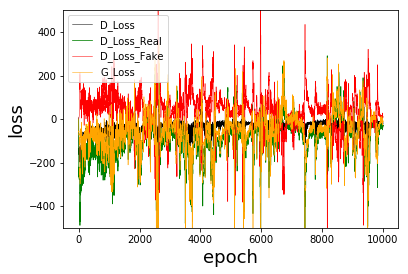

In [12]:
#batch 64 / 10000 epochs
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.5, label = 'D_Loss')

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.75, label = 'D_Loss_Real')
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5, label = 'D_Loss_Fake')
plt.plot(gan.g_losses, color='orange', linewidth=0.5, label = "G_Loss")

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)

# plt.xlim(0, 2000)
plt.ylim(-500, 500)
plt.legend()
plt.show()

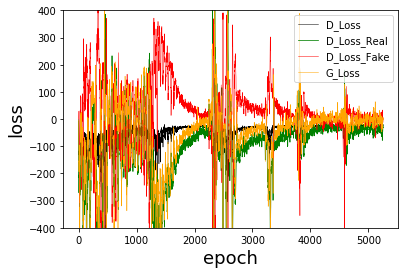

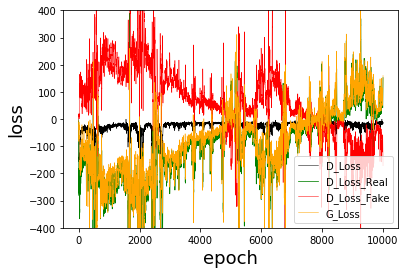

In [6]:
'''
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = 0.3
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [2,2,2,2]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [3,3,3,3]
        , generator_conv_strides = [1,1,1,1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
